In [2]:
# Installing necessary libraries
# pip install numpy,pandas,warnings,matplotlib,seaborn,plotly,scikit-learn,dash

# Libraries for data processing and analysis
import numpy as np
import pandas as pd
import warnings

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for machine learning
import sklearn
from sklearn.cluster import (
    AffinityPropagation, KMeans, DBSCAN, AgglomerativeClustering
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score
)

# Libraries for web application development
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Utility libraries
from time import time
from itertools import product

# Setting up matplotlib for inline plotting
%matplotlib inline

# Define your custom color palette
colors = px.colors.qualitative.Dark2

In [3]:
# Reading into a dataframe
data = pd.read_csv('shopping_trends_updated.csv')

In [4]:
# Displaying information about the dataset, including the data types, non-null counts, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# Generating descriptive statistics for the 'Purchase Amount (USD)' column
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Counting the frequency of unique values in the 'Frequency of Purchases' column
for column in data.columns:
    if data[column].dtype == 'object':
        # Printing the value counts for the categorical column
        print(data[column].value_counts())
        print()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West

In [ ]:
# Droping duplicates
if data.index.is_unique==False:
    num_duplicates_before = len(data) - len(data.drop_duplicates())
    data = data.drop_duplicates()
    num_duplicates_after = len(data) - len(data.drop_duplicates())
    print("Number of duplicates before dropping:", num_duplicates_before)
    print("Number of duplicates after dropping:", num_duplicates_after)
    # Printing the duplicated rows after dropping
    print(data[data.duplicated()])
else:
    print("There are no duplicates")


There are no duplicates


In [ ]:
# Checking missing values in the column and if there is,replacing them with median of columns
num_missing_before = data.isnull().sum().sum()

for col in data.columns:
    if data[col].isnull().any():
        median = data[col].median()
        data[col].fillna(median, inplace=True)
        print("Handled missing values in column:", col)

num_missing_after = data.isnull().sum().sum()

num_missing_handled = num_missing_before - num_missing_after
print("Number of missing values handled:", num_missing_handled)

#Printing rows if any
missing_rows = data[data.isnull().any(axis=1)]
if len(missing_rows) == 0:
    print("No missing values found after handling.")
else:
    print("Rows containing missing values after handling:")
    print(missing_rows)


Number of missing values handled: 0
No missing values found after handling.


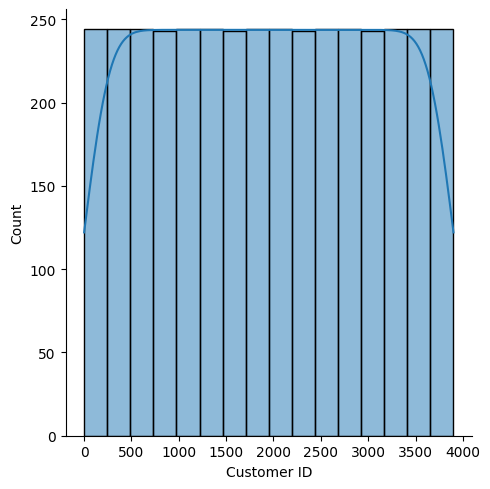

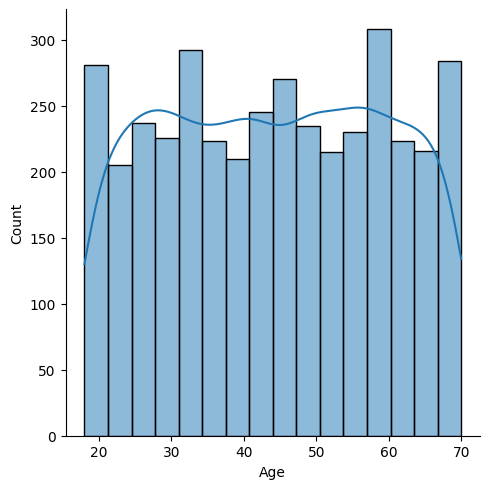

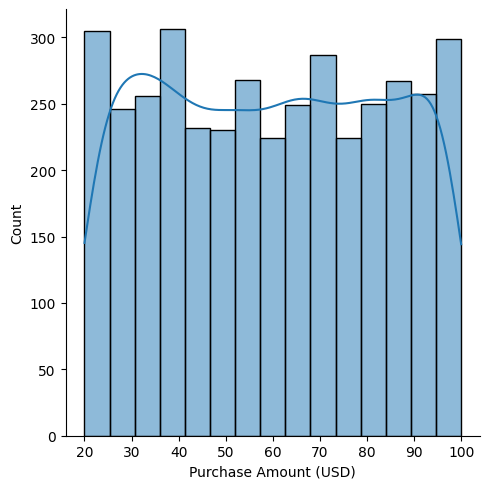

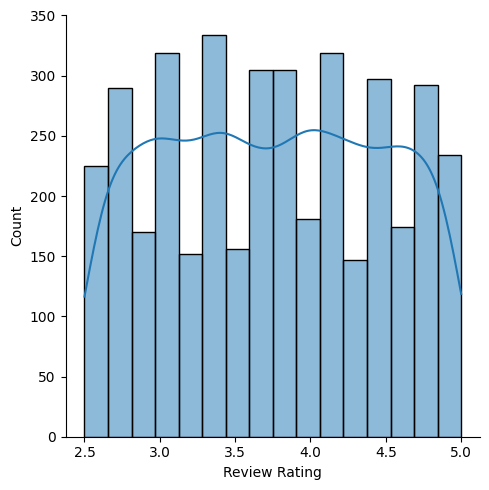

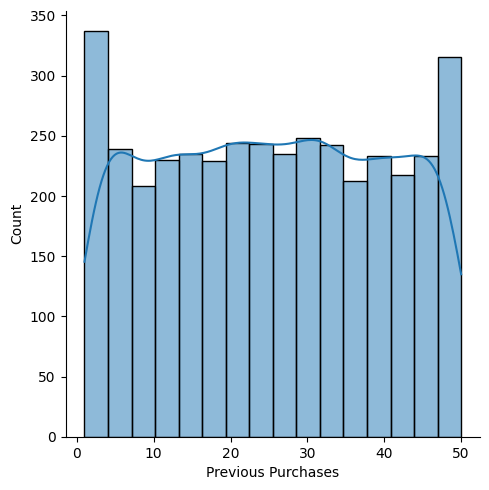

In [ ]:
#Untransformed data
numerical_columns = data.select_dtypes(include=[np.number]).columns
for numerical in numerical_columns:
    untransformed = sns.displot(data[numerical], kde=True)

Transformed numerical columns: []
Number of transformed numerical columns: 0


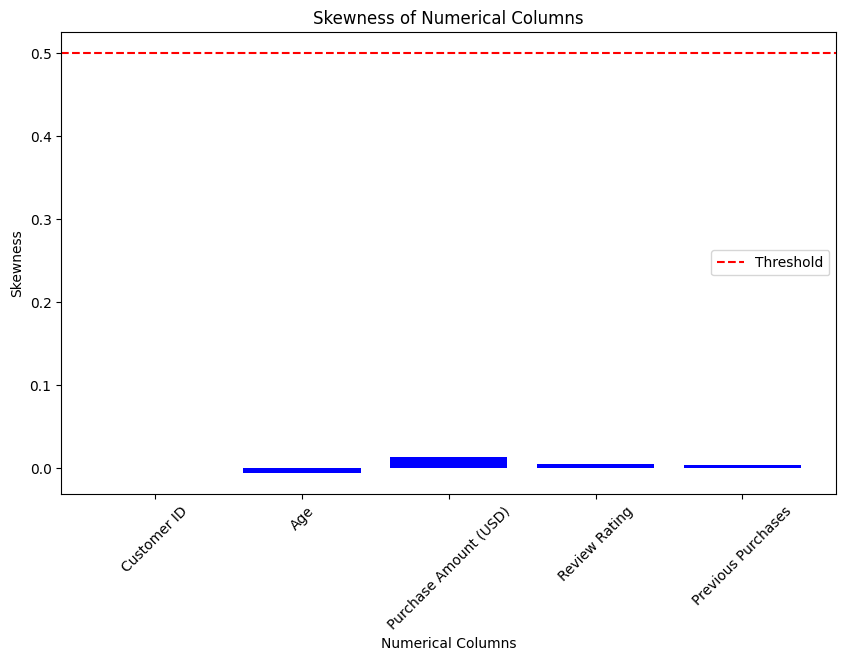

In [ ]:
# Defining numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Threshold for skewness
skew_threshold = 0.5

# Calculating skewness for numerical columns
skewness = data[numerical_columns].skew()

# If skewness is above the threshold,perform log transformation for each column
for col in numerical_columns:
    if np.abs(skewness[col]) > skew_threshold:
        min_val = data[col].min()
        if min_val <= 0:
            data[col] = data[col] - min_val + 1
        data[col] = np.log(data[col])

# Printing numerical columns that needed to be transformed
transformed_numerical_columns = [col for col in numerical_columns if np.abs(skewness[col]) > skew_threshold]
print(f"Transformed numerical columns: {transformed_numerical_columns}")
num_transformed_numerical_columns = len(transformed_numerical_columns)
print("Number of transformed numerical columns:", num_transformed_numerical_columns)

# Plotting histogram of skewness values
plt.figure(figsize=(10, 6))
plt.bar(skewness.index, skewness.values, color='blue')
plt.axhline(y=skew_threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Numerical Columns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

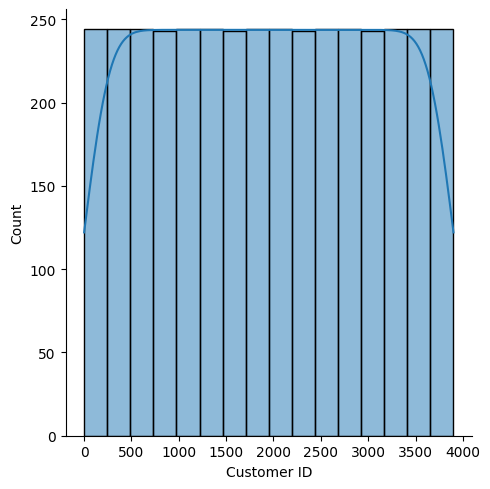

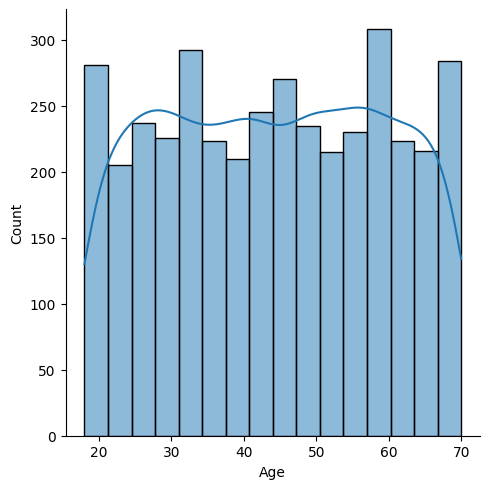

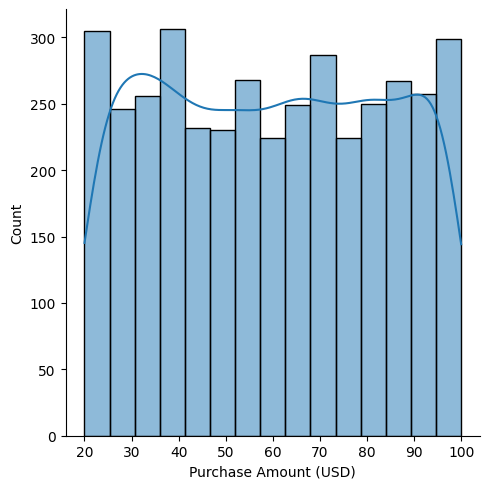

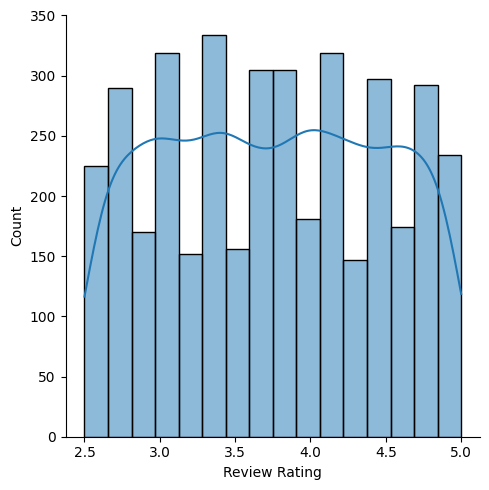

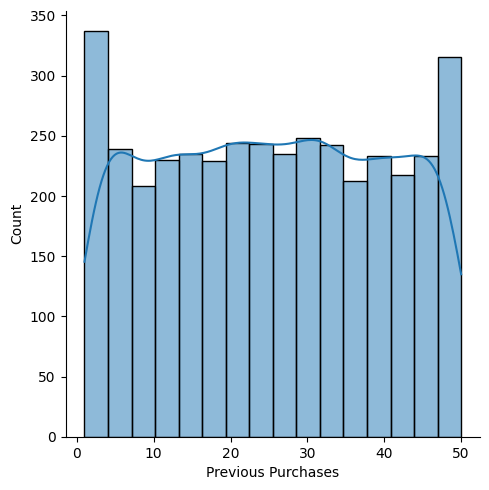

In [ ]:
#Transformed data(if needed)
numerical_columns = data.select_dtypes(include=[np.number]).columns
for numerical in numerical_columns:
    transformed = sns.displot(data[numerical], kde=True)

In [ ]:
#Normalizing outliers
def correct_outliers(data, z_score_threshold=3):
    # Initializing an empty dataframe
    data_corrected = pd.DataFrame(index=data.index, columns=data.columns)

    outlier_count = 0
    # Storing the indices of rows containing outliers
    outlier_indices = []

    for col in data.select_dtypes(include=[np.number]):
        z_scores = (data[col] - data[col].mean()) / data[col].std()
        outliers = np.abs(z_scores) > z_score_threshold
        median_value = data[col].median()
        corrected_values = np.where(outliers, median_value, data[col])
        outlier_count += np.sum(outliers)
        outlier_indices.extend(data.index[outliers])
        data_corrected[col] = corrected_values

    # Removing duplicate indices and listing
    outlier_indices = list(set(outlier_indices))

    # Printing the total number of outliers corrected
    print("Total number of outliers corrected:", outlier_count)

    # Printing the rows that contain outliers
    if len(outlier_indices) > 0:
        print("Rows containing outliers before correction:", outlier_indices)

    return data_corrected

In [ ]:
#Calling the function to correct the data
data_corrected = correct_outliers(data)

Total number of outliers corrected: 0


In [ ]:
#Selecting all columns except the ID column (case insensitive)
features = [col for col in data.columns[1:] if 'ID' not in col.lower()]
features

['Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

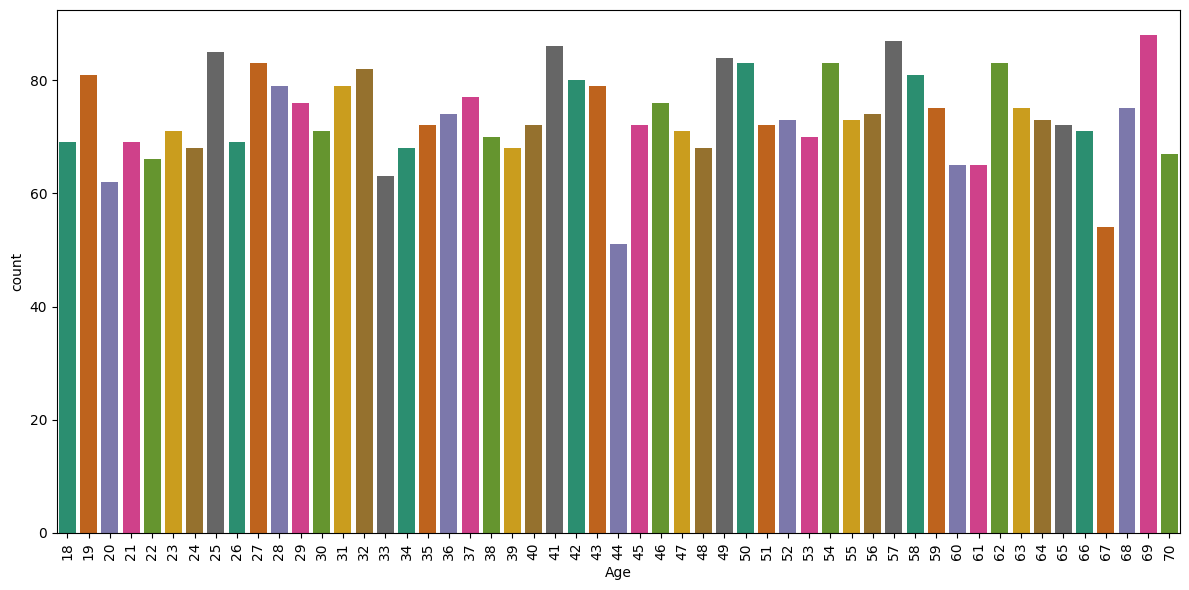

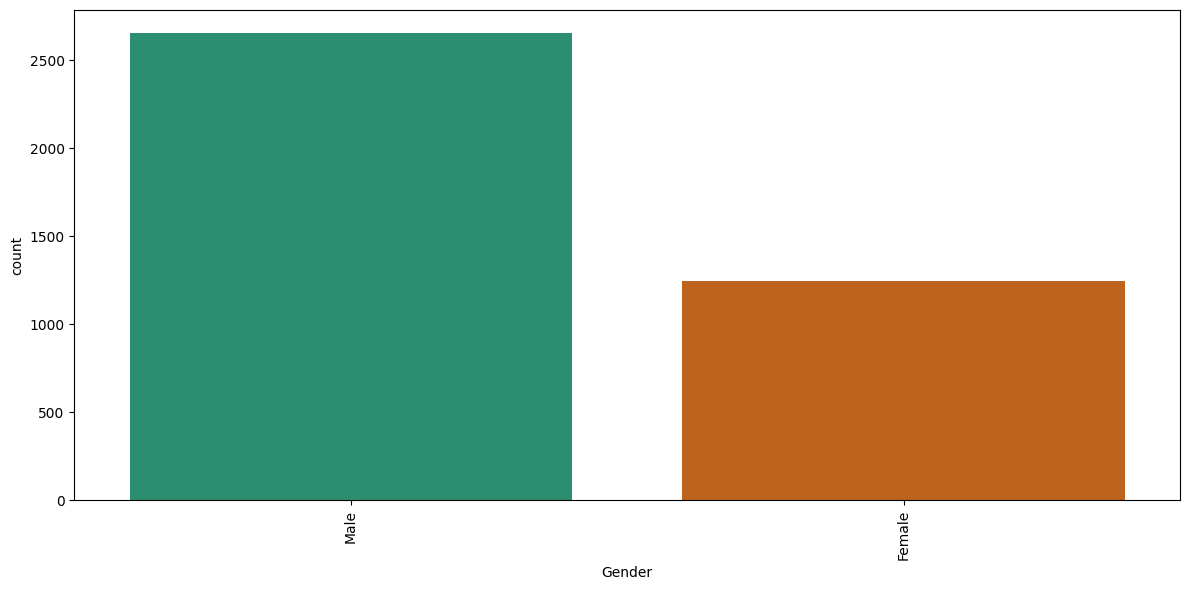

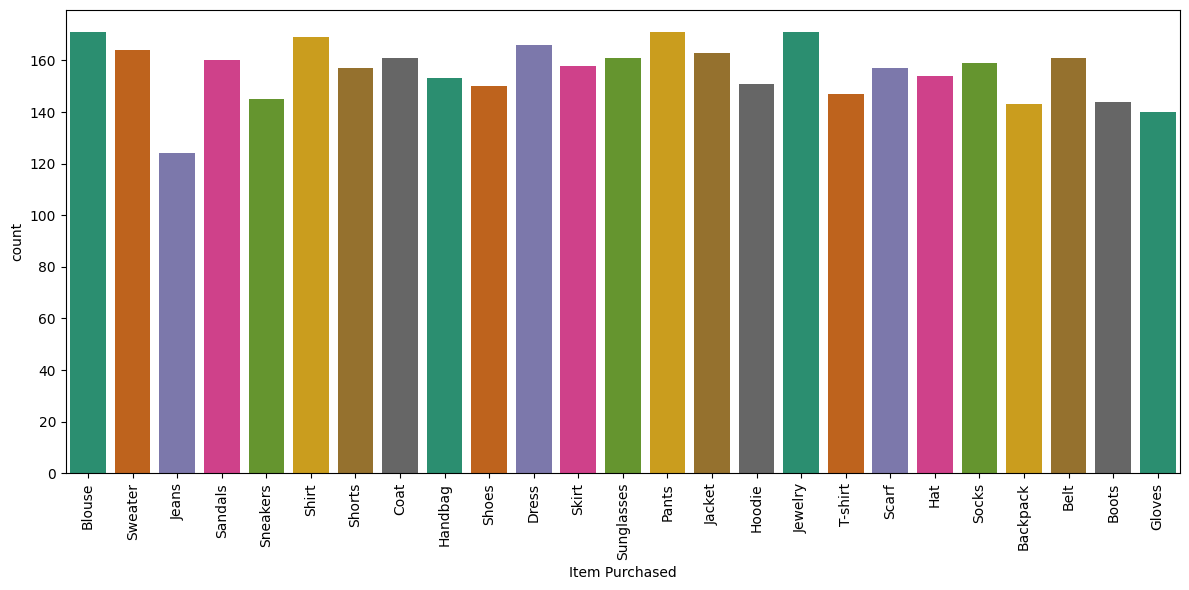

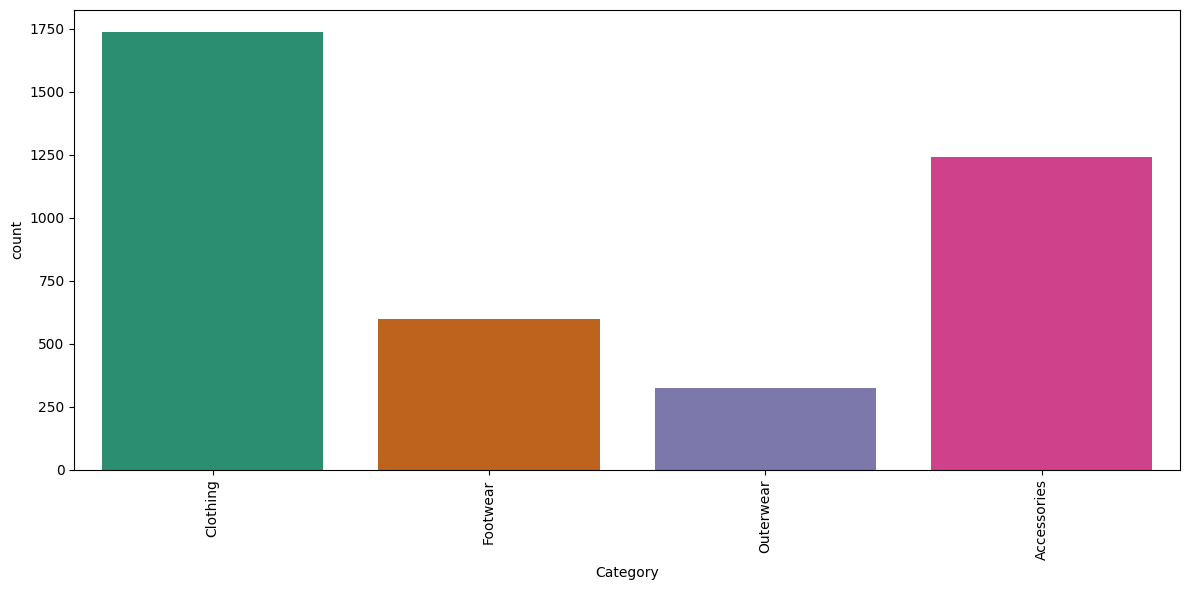

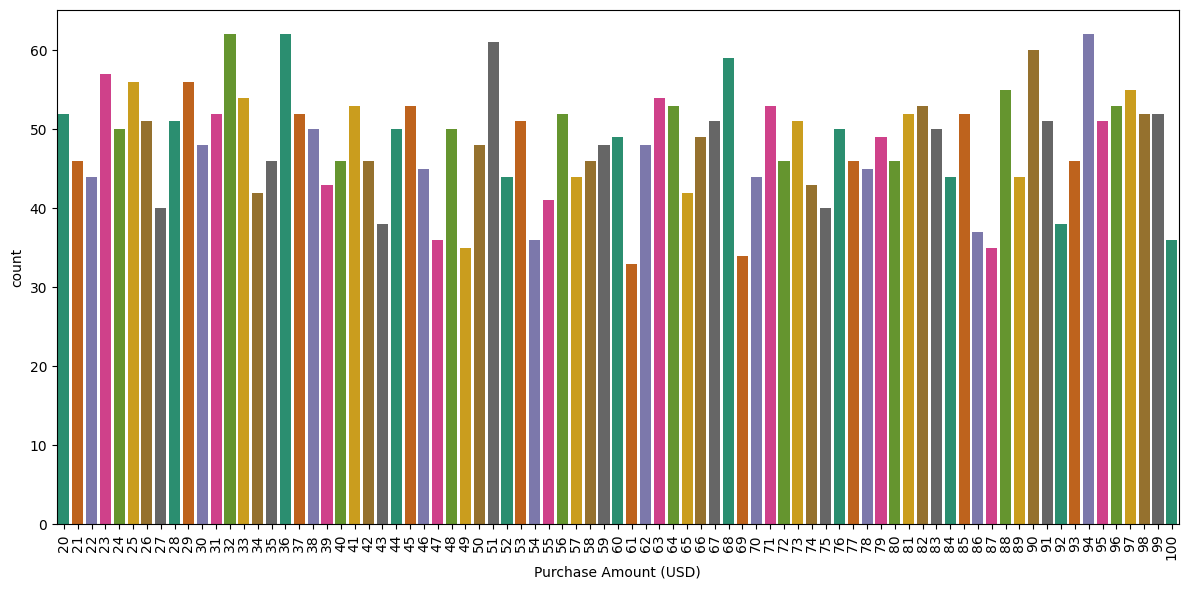

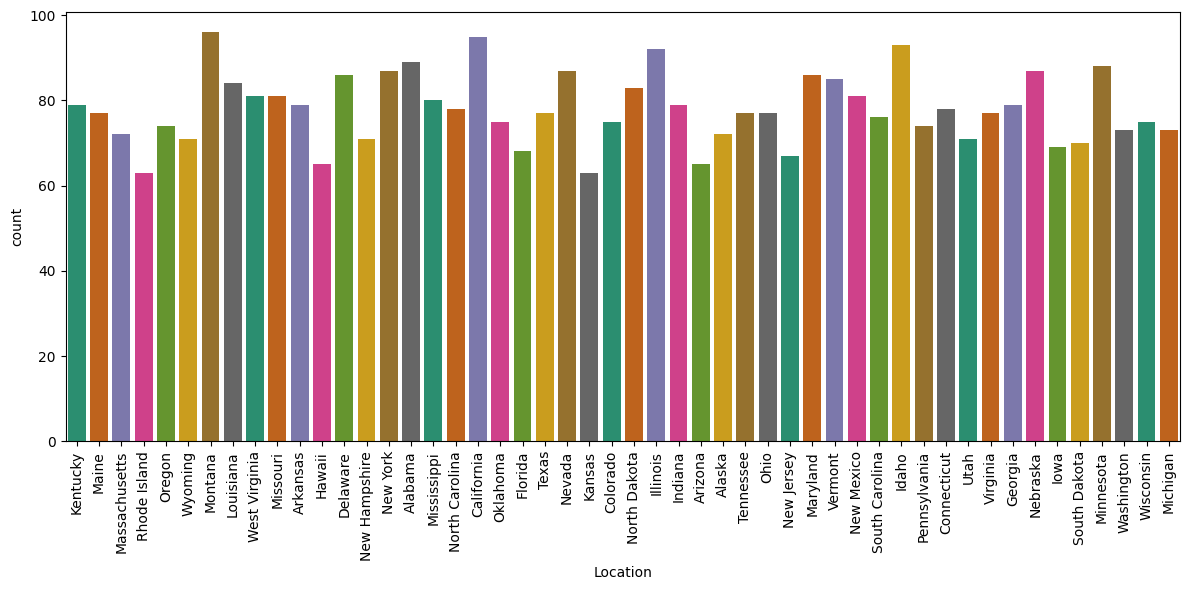

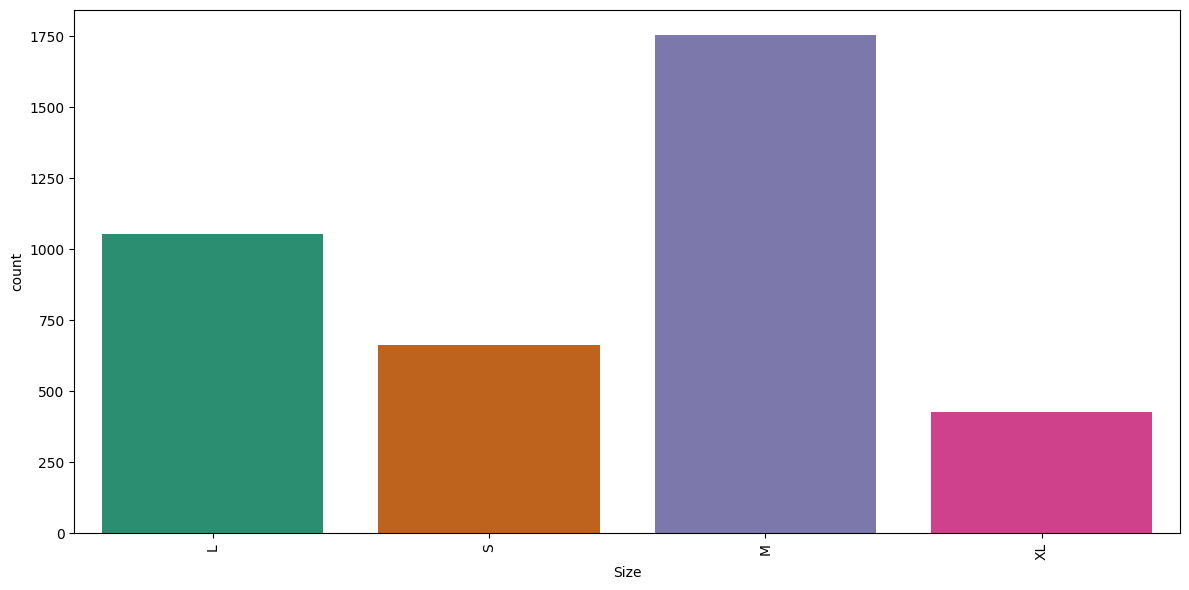

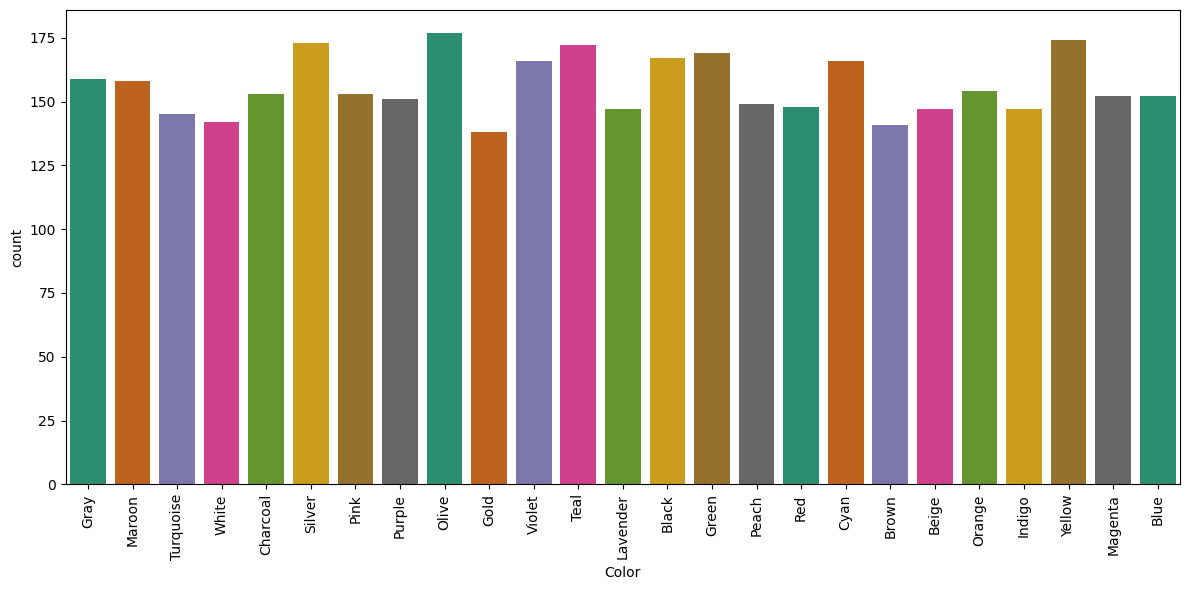

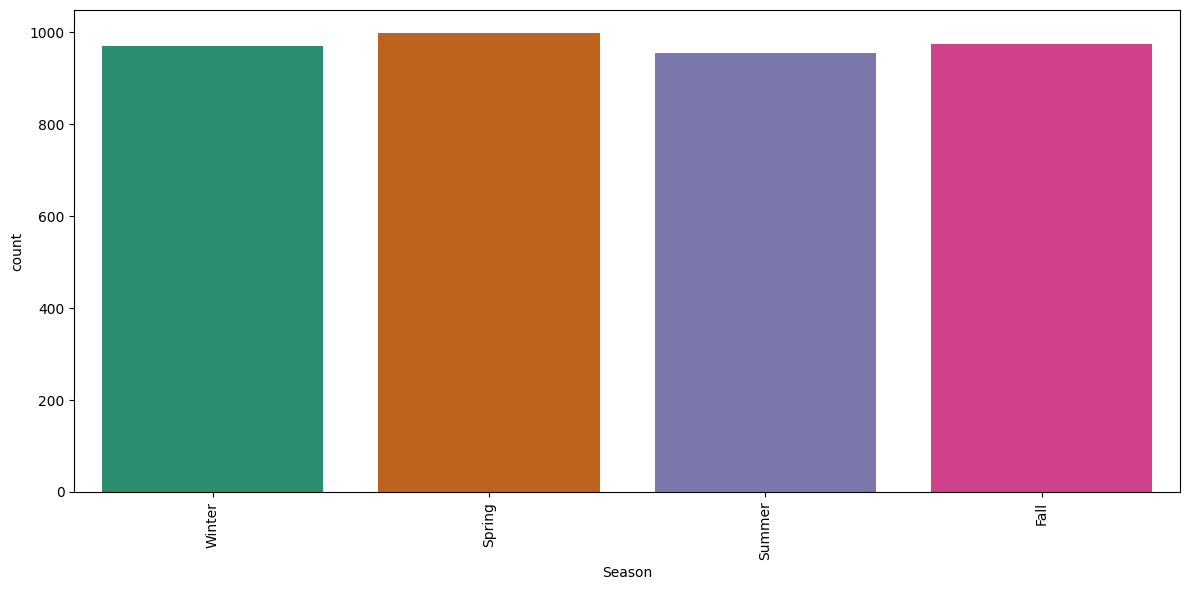

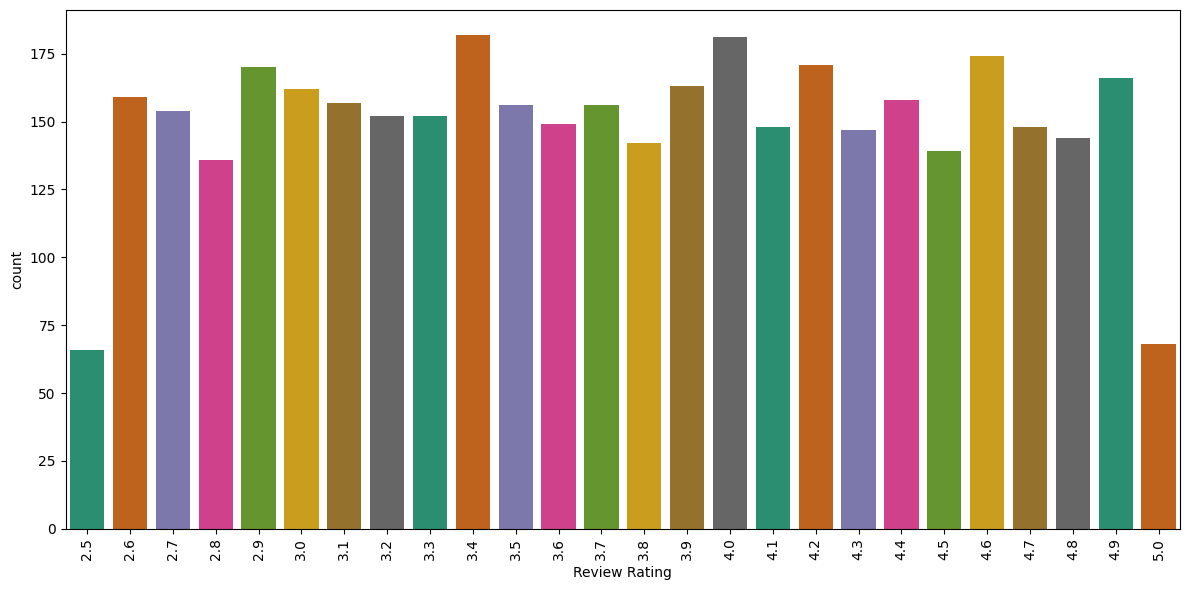

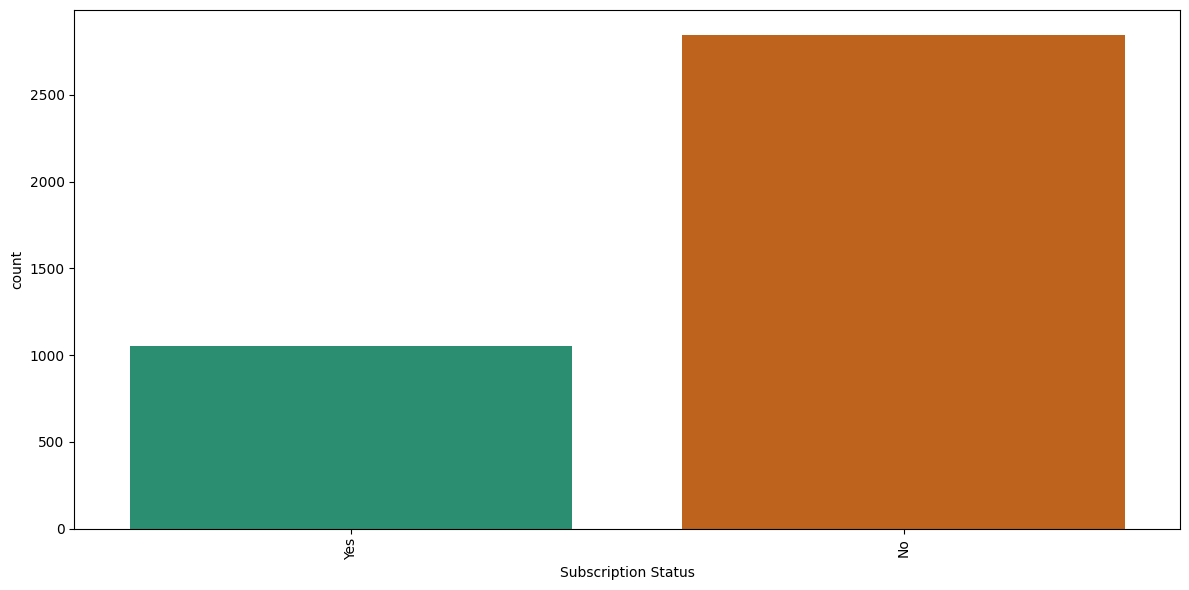

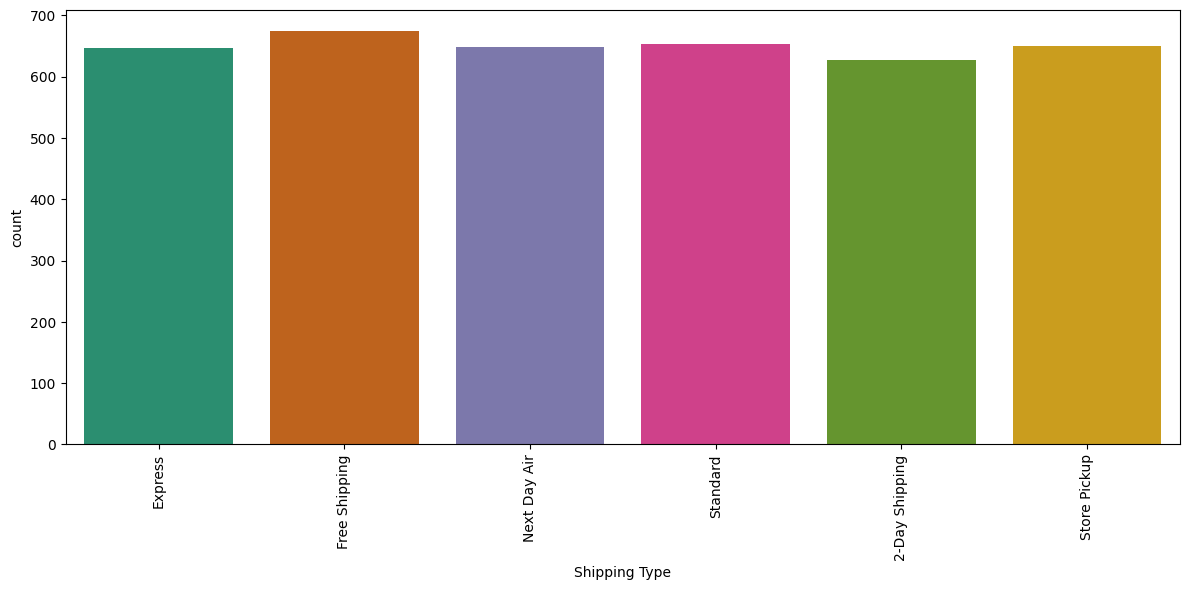

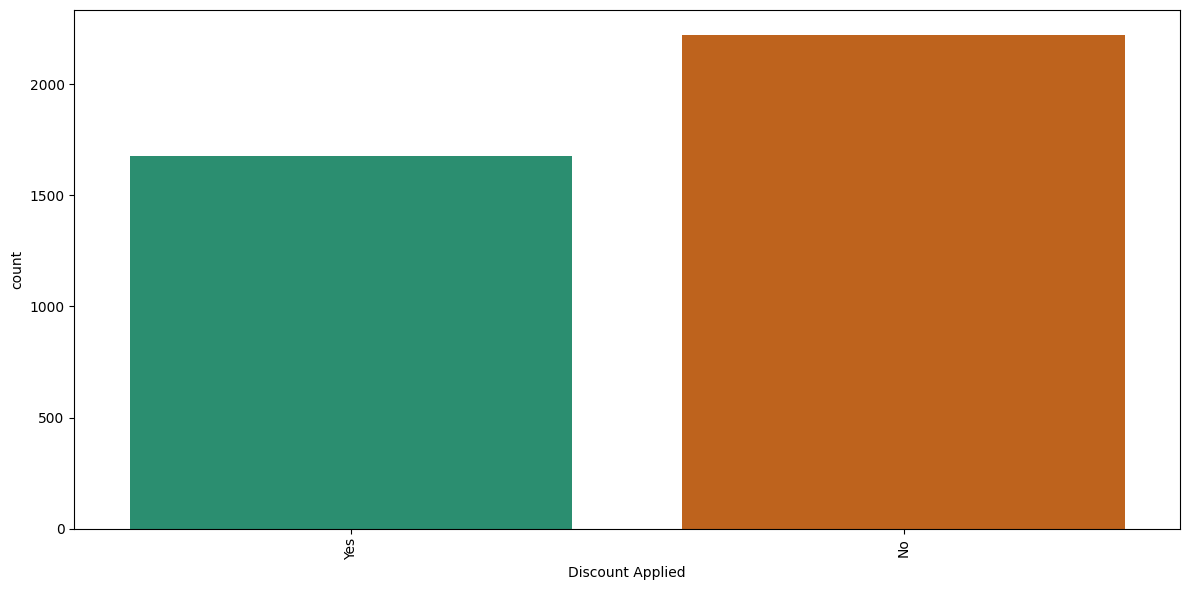

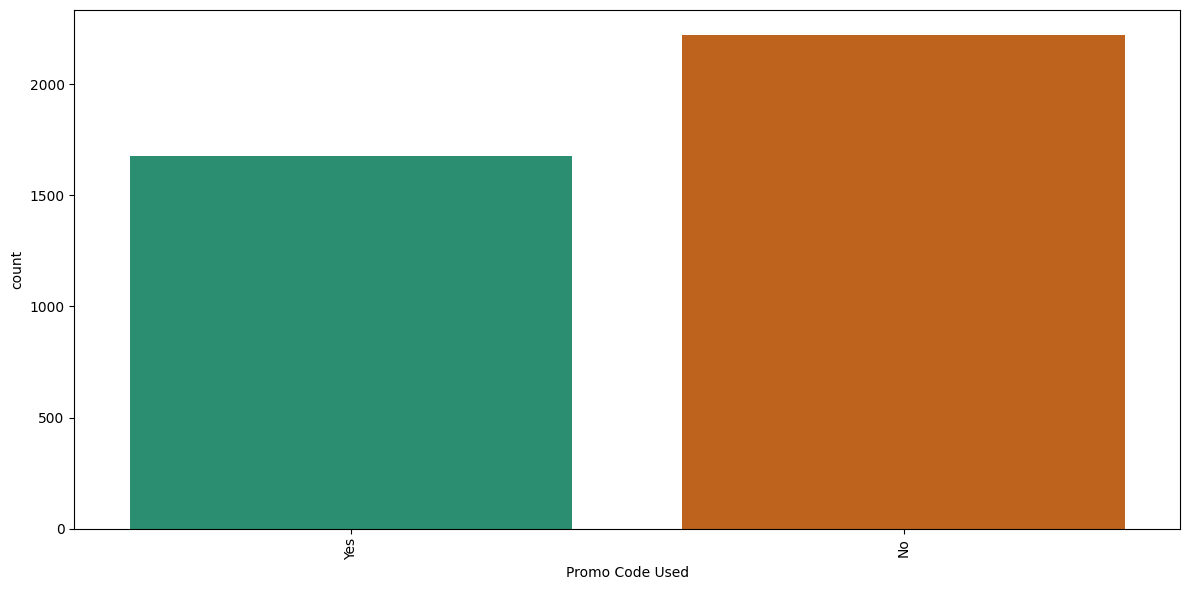

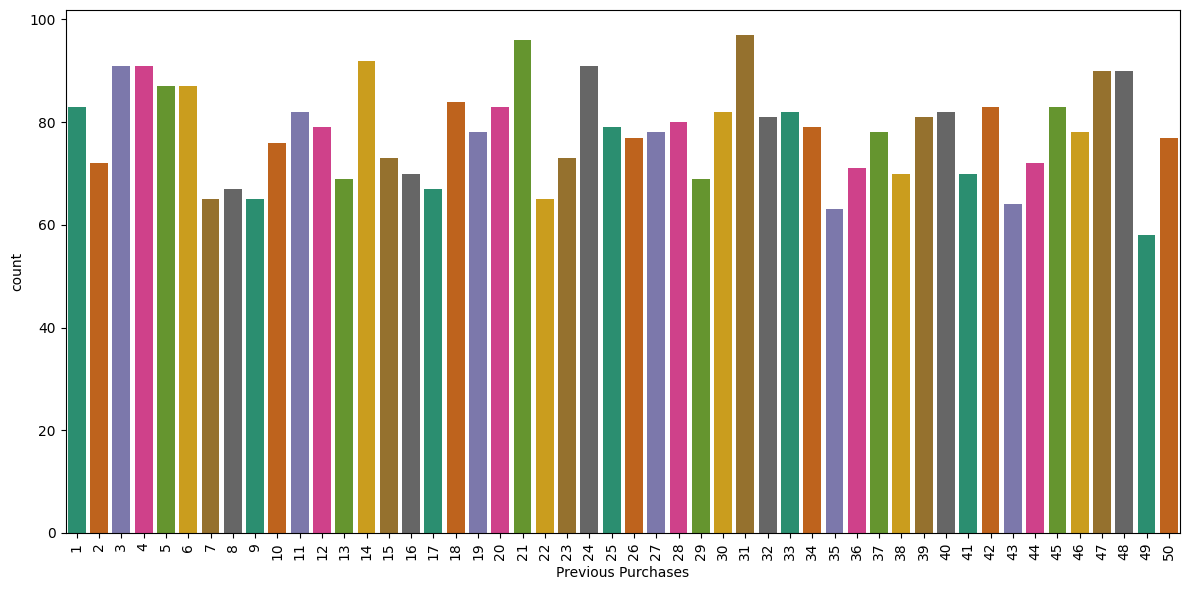

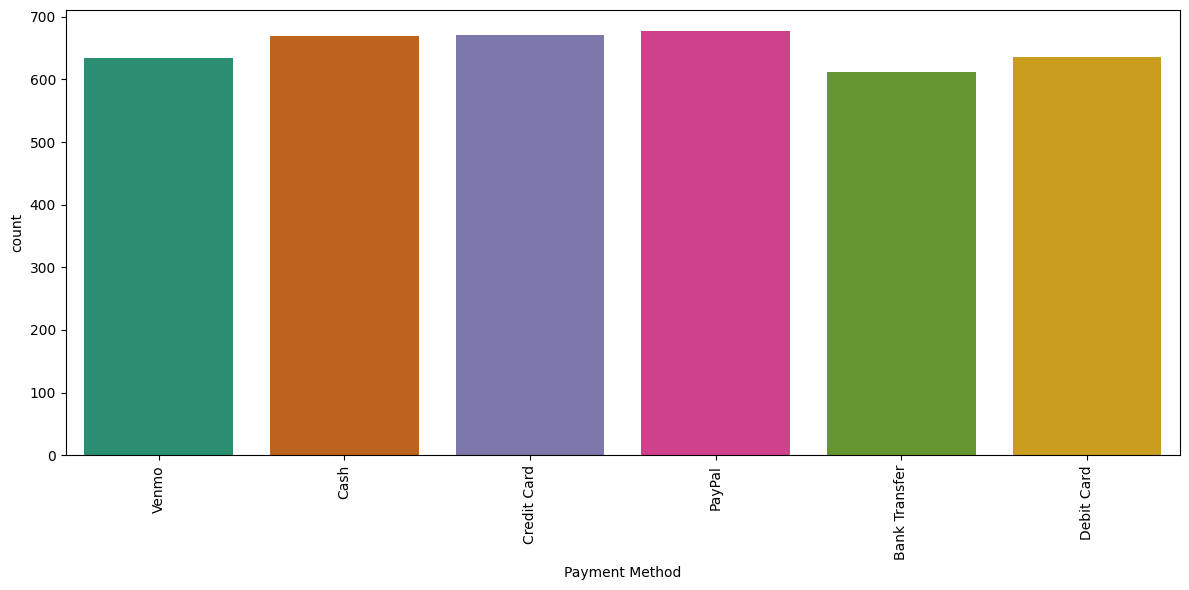

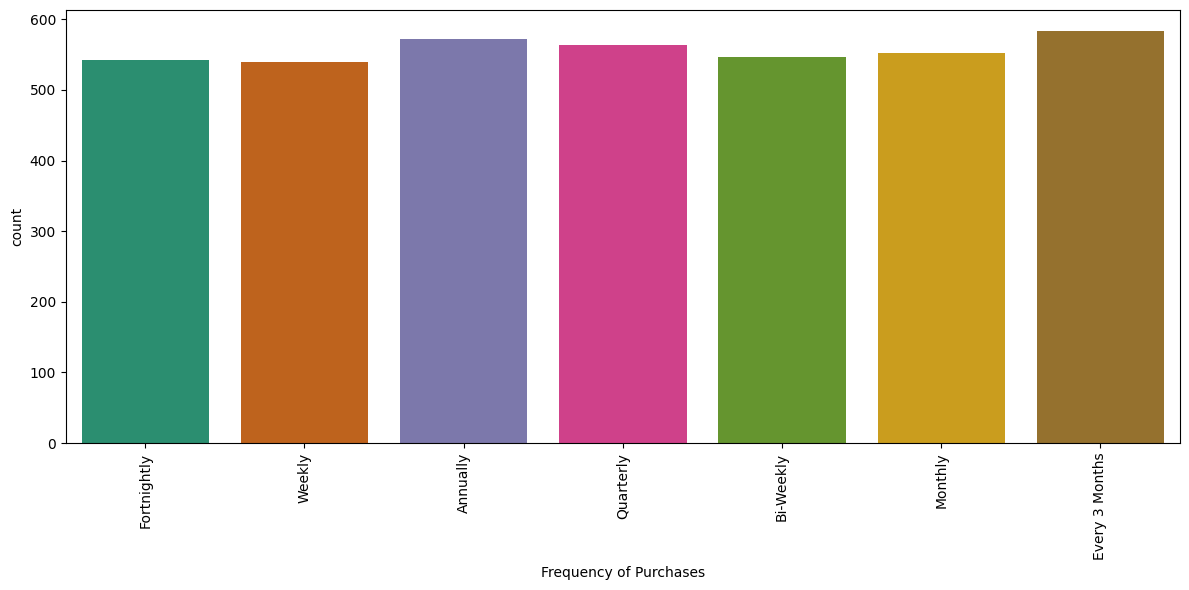

In [ ]:
#Visualizing data
for f in features:
    # Adjusting figure size
    plt.figure(figsize=(12, 6))
    sns.countplot(x=f, data=data, palette='Dark2',hue=f,legend=False)
    plt.xticks(rotation=90)

    # Adjusting spacinging between ticks
    plt.tight_layout()
    plt.show()

In [ ]:
#Making a copy of orijinal data
raw_data= data.copy()
#Excluding ID column
data = data[features]
#Selecting categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
#Converting categorical columns into numerical columns
new_data = pd.get_dummies(data, columns = categorical_columns,dtype=int)
#Displaying the new data
new_data

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,19,64,3.1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,50,73,3.1,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,90,3.5,49,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,45,49,2.7,31,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,28,4.2,32,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3896,52,49,4.5,41,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,46,33,2.9,24,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3898,44,77,3.8,24,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Creating a barplot with correlation coefficients and feature names
def plot_correlation_barplot(series, feature):
    plt.figure(figsize=(10, 8))
    sns.barplot(x=series.values, y=series.index, palette="coolwarm",hue=series.index,legend=False,dodge=False)
    plt.title(f"Correlation with Purchase Amount (USD) by {feature}")
    plt.xlabel(f"Correlation Coefficient")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.plot()

In [ ]:
# Returning dictionaries containing max and min correlation for each feature
def analyze_correlation(features, correlation_series):
    max_correlation = {}
    min_correlation = {}

    for feature in features:
        # Filtering the correlation series to include only correlations related to the current feature
        filtered_series = correlation_series[correlation_series.index.str.contains(feature)]
        # Ploting a correlation barplot for the current feature
        plot_correlation_barplot(filtered_series, feature)

        max_feature = filtered_series.idxmax()
        max_correlation[feature] = (max_feature, filtered_series.max())

        min_feature = filtered_series.idxmin()
        min_correlation[feature] = (min_feature, filtered_series.min())

    return max_correlation, min_correlation

Max correlation for Season: ('Season_Fall', 0.04370077835279646)
Min correlation for Season: ('Season_Summer', -0.03268082577081706)

Max correlation for Color: ('Color_Green', 0.05337973507913605)
Min correlation for Color: ('Color_Turquoise', -0.03443986541200366)

Max correlation for Method: ('Payment Method_Debit Card', 0.021448851758272637)
Min correlation for Method: ('Payment Method_Venmo', -0.015159322945059126)

Max correlation for Shipping: ('Shipping Type_2-Day Shipping', 0.017913939377557572)
Min correlation for Shipping: ('Shipping Type_Standard', -0.024717548027814427)

Max correlation for Frequency: ('Frequency of Purchases_Bi-Weekly', 0.01586694789346791)
Min correlation for Frequency: ('Frequency of Purchases_Weekly', -0.013395645568599034)

Max correlation for Location: ('Location_Alaska', 0.04536030149675879)
Min correlation for Location: ('Location_Connecticut', -0.03368916698068774)

Max correlation for Item: ('Item Purchased_T-shirt', 0.026300839566449356)
Min cor

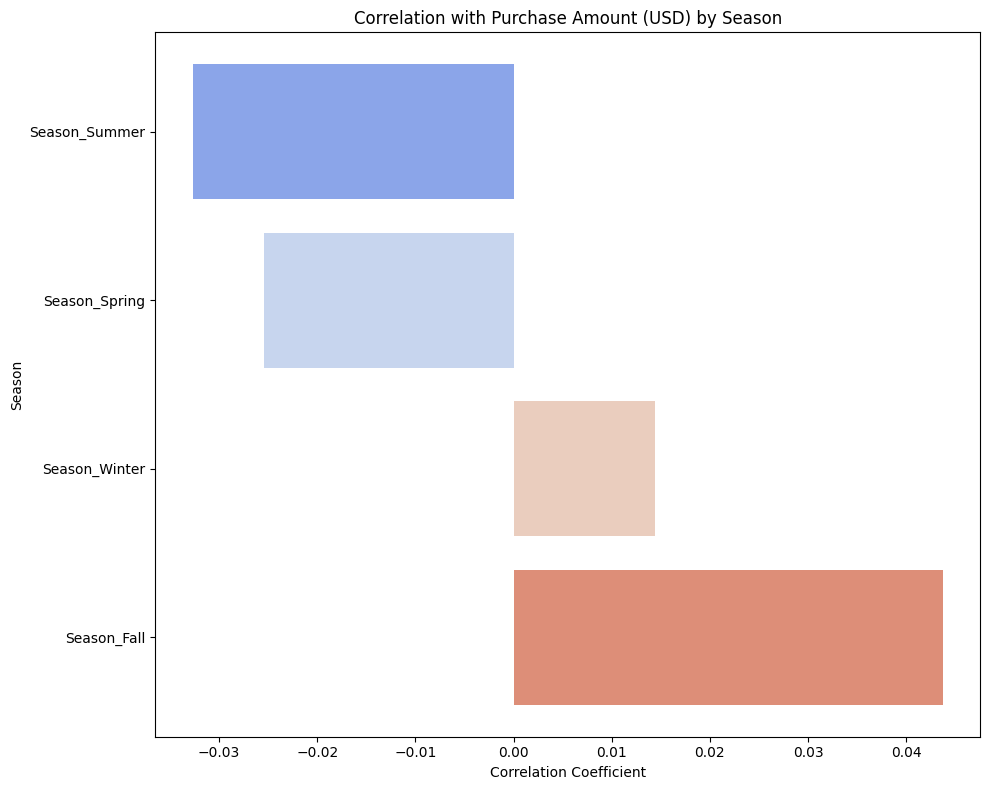

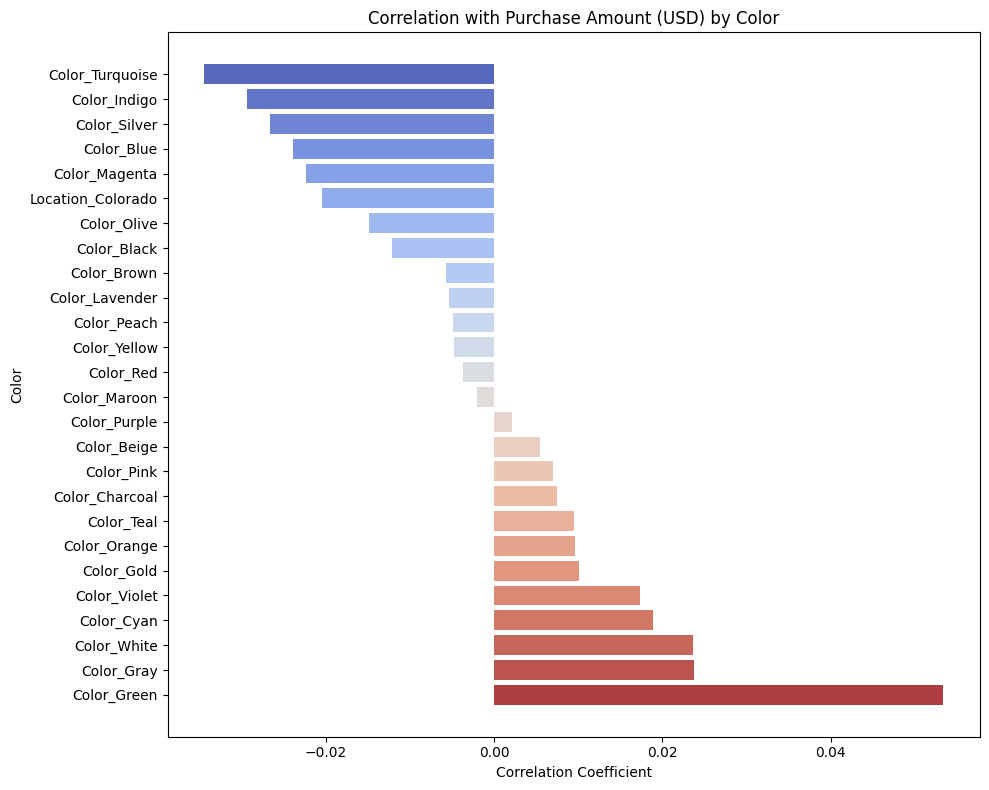

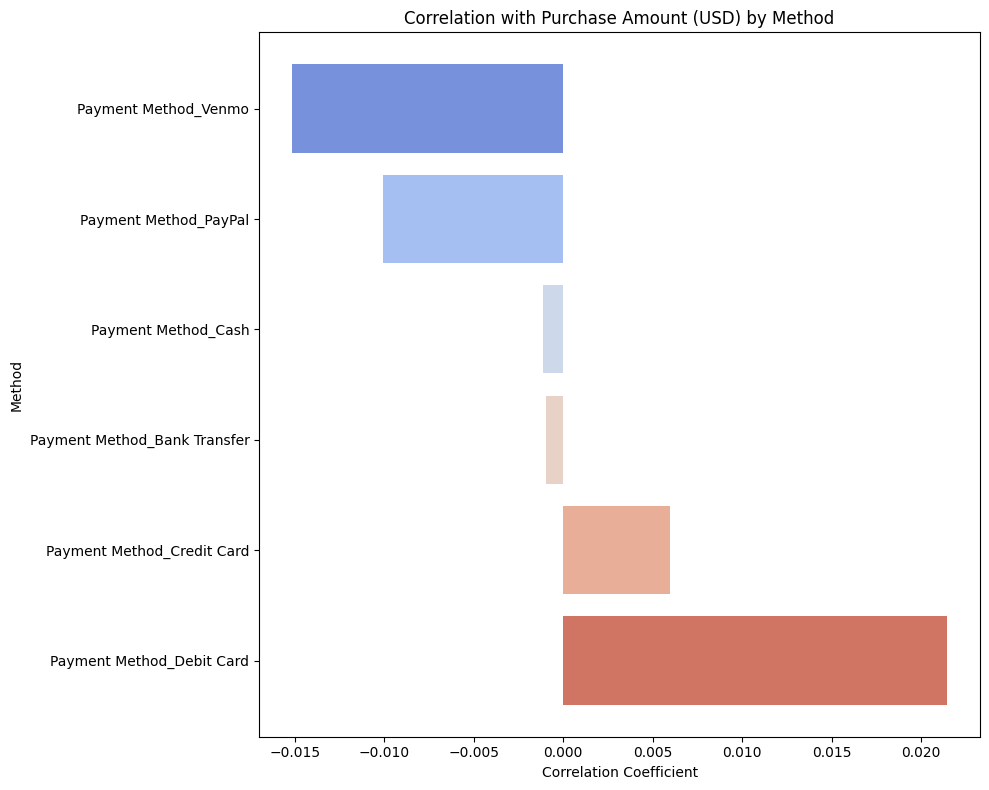

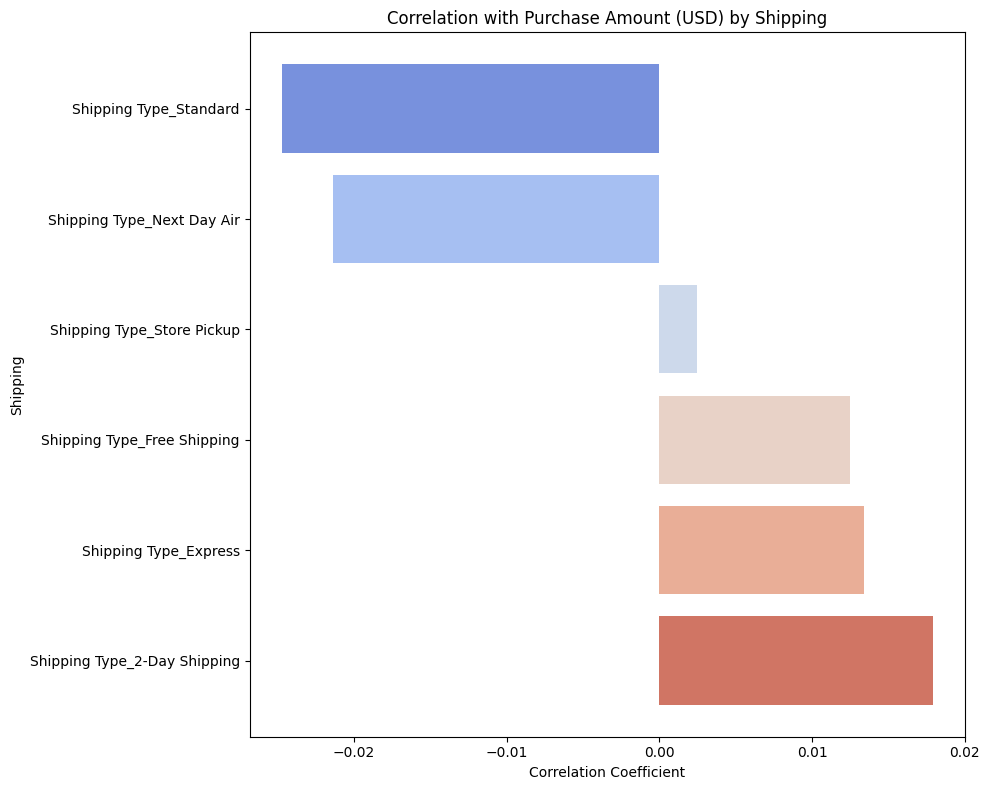

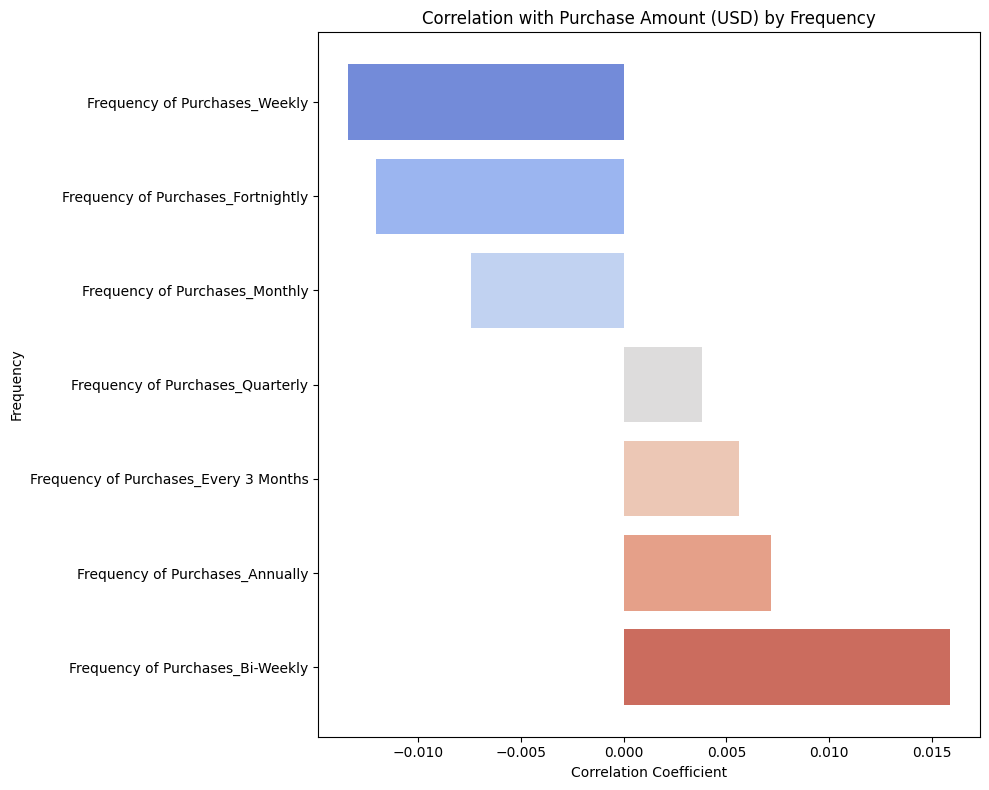

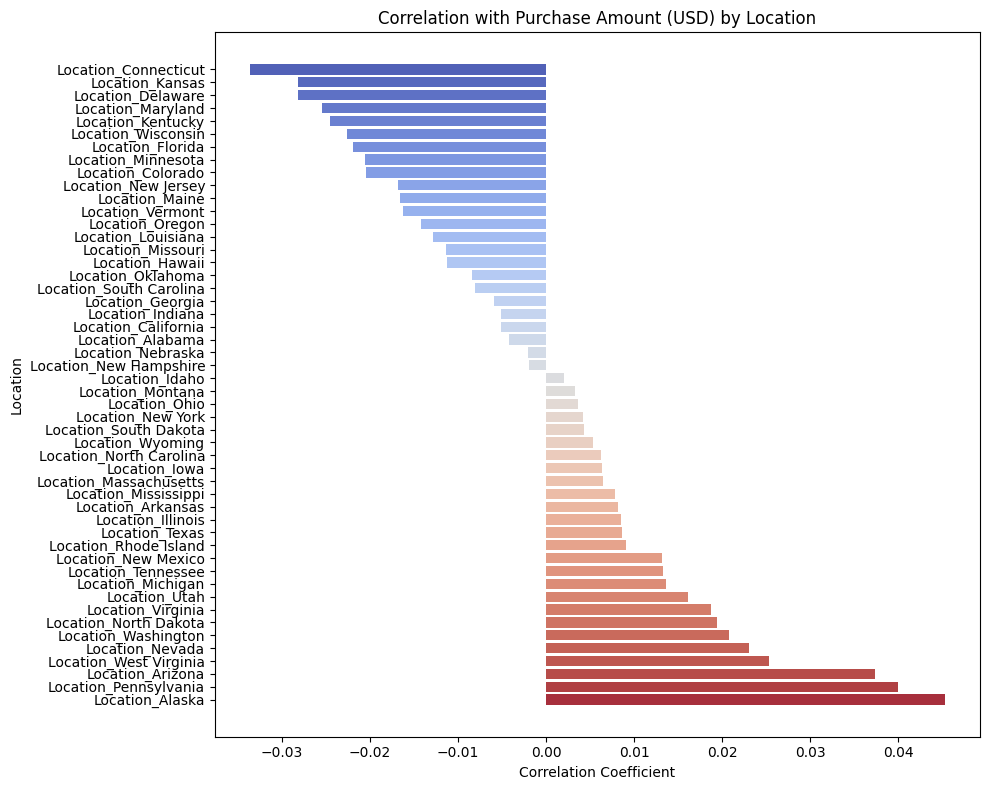

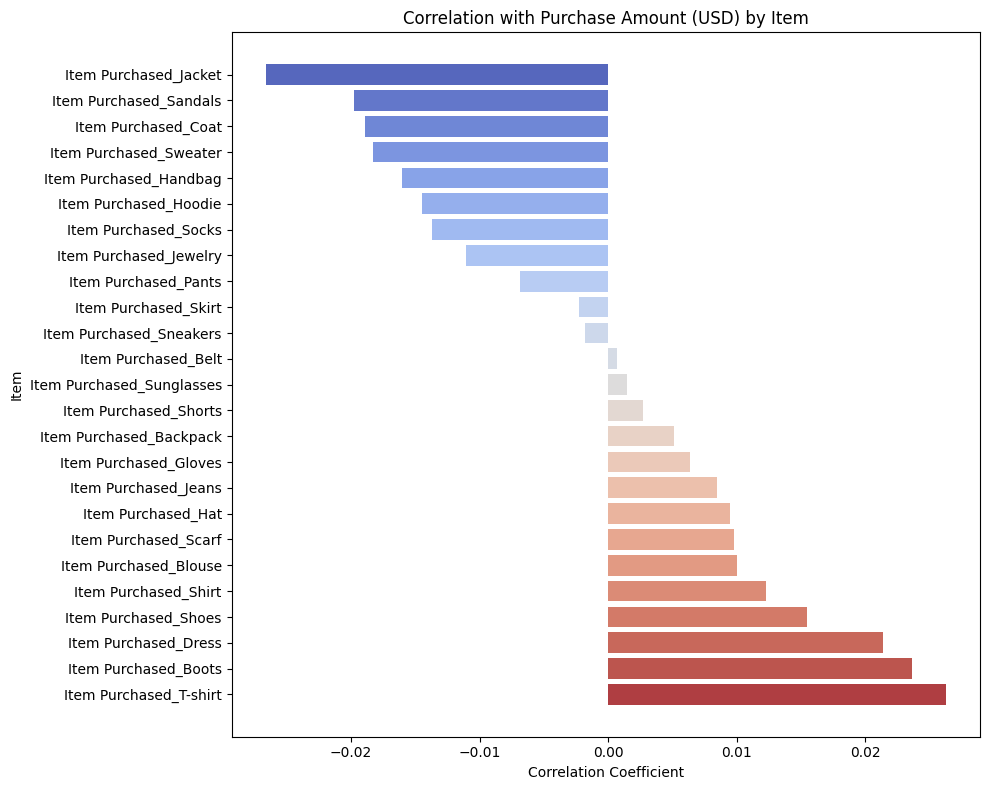

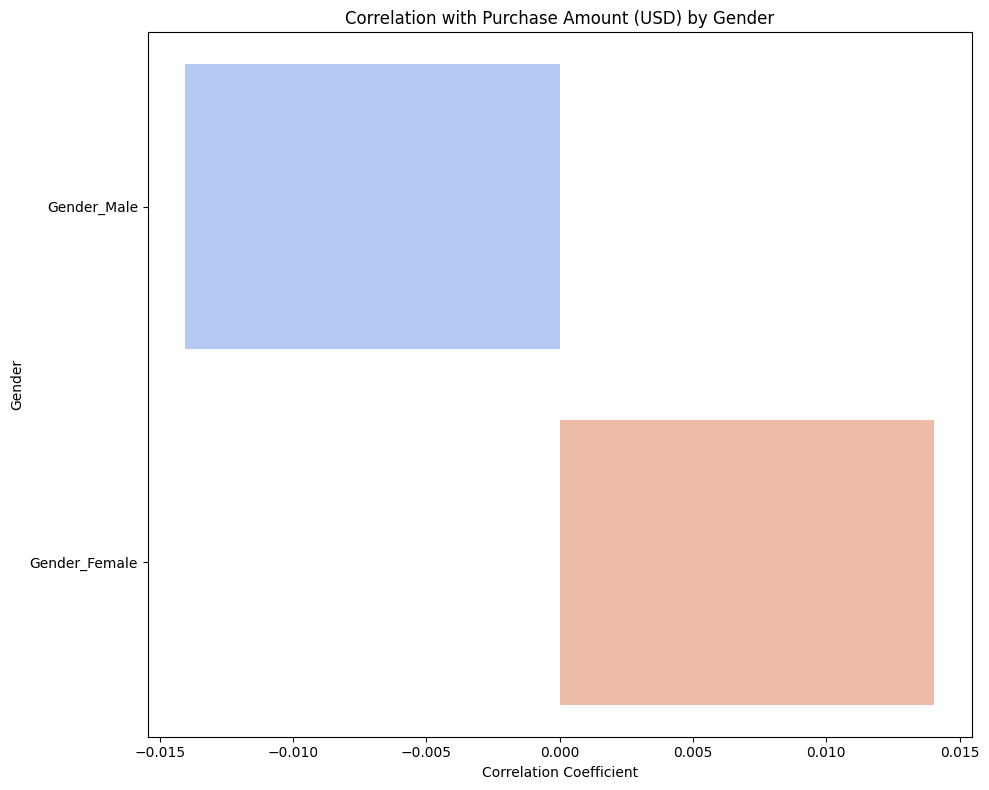

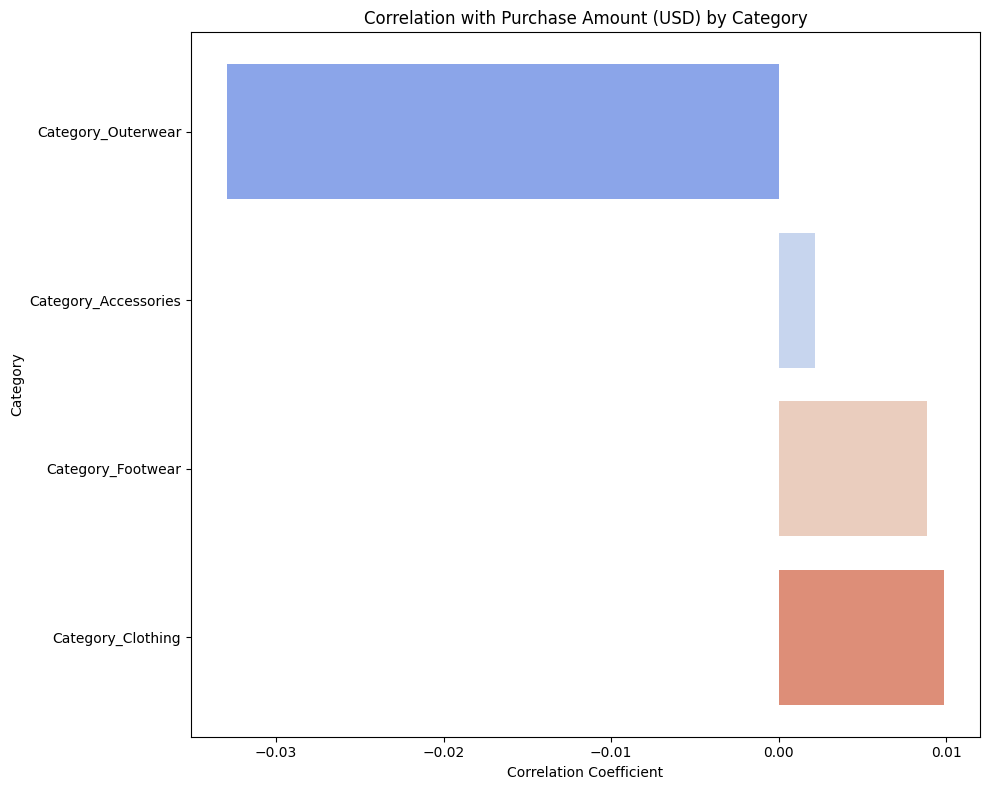

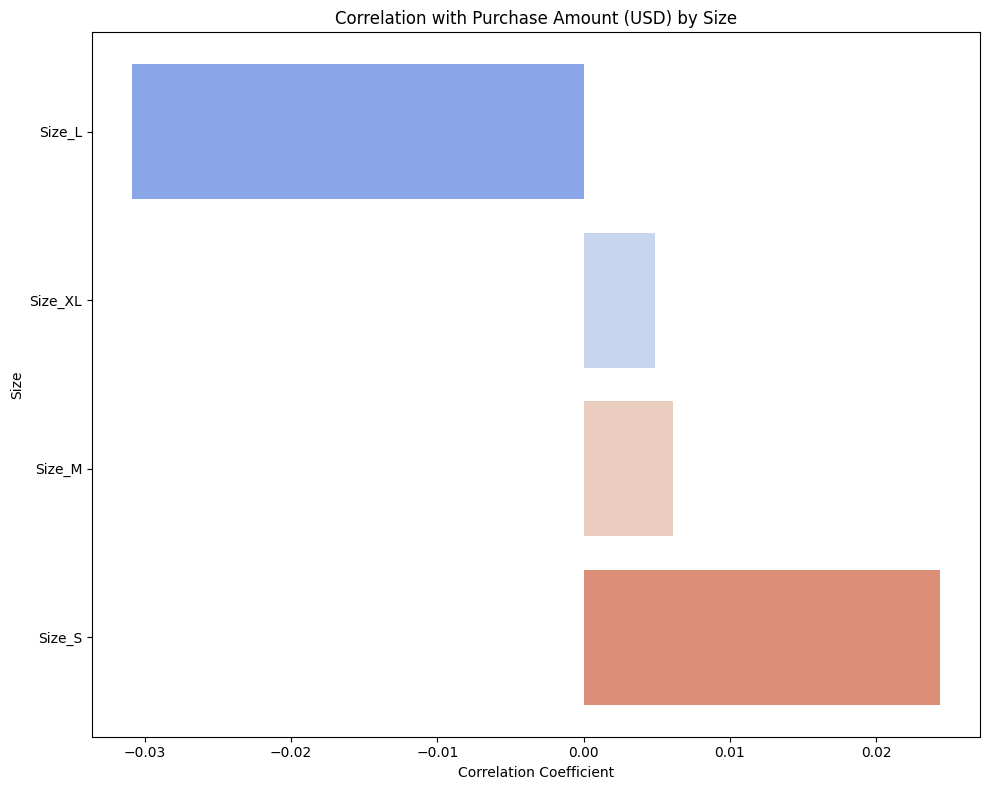

In [ ]:
# Calculating correlation matrix
correlation_matrix = new_data.corr()

# Extracting correlation with purchase amount
purchase_correlation = correlation_matrix["Purchase Amount (USD)"].sort_values()

# Interested features
selected_features = ["Season","Color","Method","Shipping","Frequency","Location","Item","Gender","Category","Size",]

# Analyzing correlation for each feature
max_correlation, min_correlation = analyze_correlation(selected_features, purchase_correlation)

# Printing results
for feature in selected_features:
    print(f"Max correlation for {feature}: {max_correlation[feature]}")
    print(f"Min correlation for {feature}: {min_correlation[feature]}")
    print()

In [ ]:
# Converting the DataFrame to a numpy array for model training
X_train = new_data.values
# Standardizing the features using the StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
# Fitting PCA on the standardized features and transforming the data into the new lower-dimensional space
pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X_std).transform(X_std)

In [ ]:
#Displaying the final numpy array data
X_r

array([[ 3.18499318, -1.48350371],
       [ 3.22266326, -2.12538812],
       [ 3.35560994, -2.06982026],
       ...,
       [-2.58794704,  2.08831906],
       [-2.54993049,  0.71718099],
       [-2.54813486,  2.02812435]])

In [ ]:
#Finding best parameters for DBSCAN
def find_best_DBSCAN_parameters(X_r):

    # Defining the range of values for eps and min sample parameters
    eps_values = [0.1,0.5,1.0,1.5,2.0]
    min_samples_values = [2,5,10,15,20]

    # Initializing variables
    best_score = -1
    best_eps_values= None
    best_min_samples_values=None

    for eps, min_samples in product(eps_values, min_samples_values):
        # Fitting DBSCAN with the current eps and min_samples values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_r)

        # Predicting cluster labels
        cluster_labels = dbscan.labels_

        # Calculating the silhouette score
        score = silhouette_score(X_r, cluster_labels)

        # Checking if the current silhouette score is better than the best score found so far
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

    #Printing the values
    print("Best Silhouette Score:", best_score)
    print("Best EPS:", best_eps)
    print("Best min_samples:", best_min_samples)
    return best_eps, best_min_samples

In [ ]:
#Finding best parameters for Affinity Propagation
def find_best_affinity_propagation_parameters(X_r):

    # Defining the range of values for damping
    damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]

    # Initializing variables
    best_score = -1
    best_damping = None

    for damping in damping_values:
        # Fitting Affinity Propagation with the current damping value
        af = AffinityPropagation(damping=damping).fit(X_r)

        # Predicting cluster labels
        cluster_labels = af.labels_

        # Calculating the silhouette score
        score = silhouette_score(X_r, cluster_labels)

        # Checking if the current silhouette score is better than the best score found so far
        if score > best_score:
            best_score = score
            best_damping = damping

    #Printing the values
    print("Best Silhouette Score:", best_score)
    print("Best k:", best_damping)
    return best_damping

In [ ]:
#Finding best parameters for Kmeans
def find_best_kmeans_numberofclusters(X_r):

    #Trying from 2 to 19 clusters
    k_values = range(2, 20)

    # Initializing variables
    best_score = -1
    best_k = None
    best_labels = None

    for k in k_values:
       # Fitting KMeans clustering
       kmeans = KMeans(n_clusters=k)

       # Predicting cluster labels
       labels = kmeans.fit_predict(X_r)

       # Computing silhouette score
       score = silhouette_score(X_r, labels)

       # Checking if the current silhouette score is better than the best score found so far
       if score > best_score:
         best_score = score
         best_k = k

    #Printing the values
    print("Best Silhouette Score:", best_score)
    print("Best k:", best_k)
    return best_k

In [ ]:
#Finding best parameters for Hierarchical Clustering
def find_best_hierarchical_numberofclusters(X_r, linkages=['ward', 'complete', 'average', 'single']):

    # Initializing variables
    best_score = -1
    best_k = None
    best_labels = None
    best_linkage = None

    for linkage in linkages:

        # Trying from 2 to 19 clusters
        for k in range(2, 20):

            # Fitting hierarchical clustering
            hierarchical = AgglomerativeClustering(n_clusters=k, linkage=linkage)

            # Predicting cluster labels
            labels = hierarchical.fit_predict(X_r)

            # Computing silhouette score
            score = silhouette_score(X_r, labels)

            # Checking if the current silhouette score is better than the best score found so far
            if score > best_score:
                best_score = score
                best_k = k
                best_linkage = linkage

    #Printing the values
    print("Best Silhouette Score:", best_score)
    print("Best k:", best_k)
    print("Best linkage:", best_linkage)

    return best_k, best_linkage

In [ ]:
#Hierarchical Clustring
def hrclustring(X_r, find_best_hierarchical_numberofclusters):
    # Starting the timer
    start_time = time()

    # Determining the optimal number of clusters and optimal linkage
    n_clusters,best_linkage = find_best_hierarchical_numberofclusters(X_r,linkages=['ward', 'complete', 'average', 'single'])

    # Instantiating and fitting the model
    hr = AgglomerativeClustering(n_clusters=n_clusters,linkage=best_linkage).fit(X_r)

    # Ending the timer
    end_time = time()

    # Calculating the running time
    running_time = end_time - start_time

    # Getting the cluster labels
    cluster_labels = hr.labels_
    print(f"Labels: {hr.labels_}")

    # Getting the number of clusters
    num_clusters = len(set(hr.labels_))

    # Predicting cluster labels
    predictions = hr.fit_predict(X_r)
    print(f"Predictions: {predictions}")

    # Calculating the counts of the clusters
    unique, counts = np.unique(predictions, return_counts=True)
    counts = counts.reshape(1,num_clusters)
    column_names = []
    for i in range(0, num_clusters):
      column_names.append(f"Cluster {i}")

    # Creating a dataframe
    countscldf = pd.DataFrame(counts, columns=column_names)
    print(countscldf)

    #Visulizing the PCA of Clusters
    plt.figure(figsize=(10, 6))
    for i in range(num_clusters):
        plt.scatter(X_r[predictions == i, 0], X_r[predictions == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Clusters')
    plt.legend()
    plt.show()

    return cluster_labels, running_time,num_clusters,"Hierarchical"

Best Silhouette Score: 0.8157306799235402
Best k: 12
Best linkage: ward
Labels: [0 0 0 ... 2 5 2]
Predictions: [0 0 0 ... 2 5 2]
   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
0        457        556        392        274        334        300   

   Cluster 6  Cluster 7  Cluster 8  Cluster 9  Cluster 10  Cluster 11  
0        450        209        305        262         220         141  


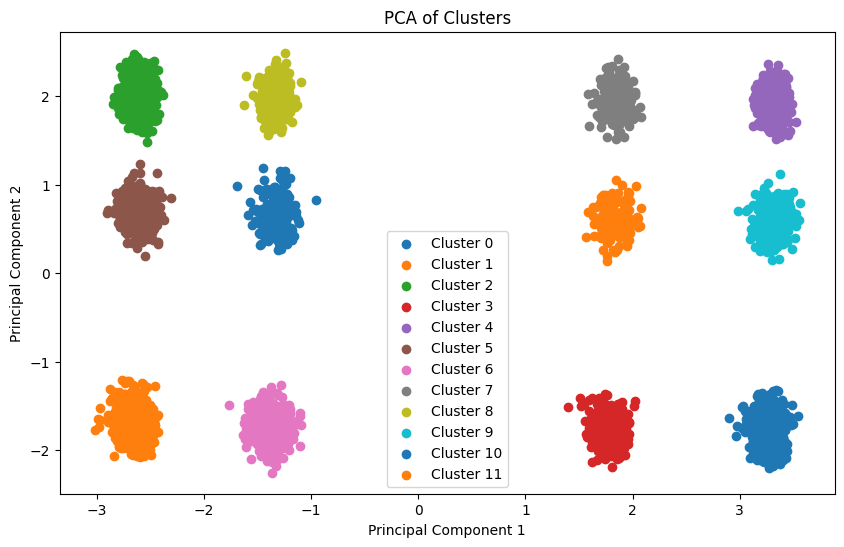

In [ ]:
#Calling the hierarchical clustering function
clustering_hr,runtime_hr,num_clusters_hr,name_hr=hrclustring(X_r,find_best_hierarchical_numberofclusters)

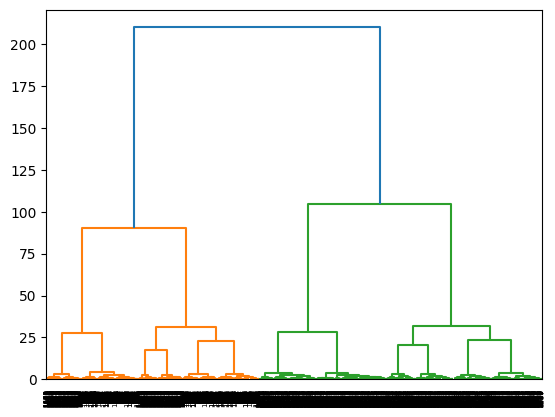

In [ ]:
#Visualizing the dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_r, method='ward'))

In [ ]:
#Visualizing the method
hc = AgglomerativeClustering(n_clusters= num_clusters_hr, linkage='ward')
hc

AgglomerativeClustering(n_clusters=12)

In [ ]:
#DBSCAN
def dbscan(X_r, find_best_DBSCAN_parameters):
    # Starting the timer
    start_time = time()

    # Find the best dbscan parameters
    eps,min_samples = find_best_DBSCAN_parameters(X_r)

    # Instantiating and fitting the dbscan model
    dbscan = DBSCAN(eps=eps,min_samples=min_samples).fit(X_r)

    # Ending the timer
    end_time = time()

    # Calculating the running time
    running_time = end_time - start_time

    # Getting the cluster labels
    cluster_labels = dbscan.labels_
    print(f"Labels: {cluster_labels}")

    # Getting the number of clusters
    num_clusters = len(set(dbscan.labels_))

    # Predicting cluster labels
    predictions = dbscan.fit_predict(X_r)
    print(f"Predictions: {predictions}")

    # Calculating the counts of the clusters
    unique, counts = np.unique(predictions, return_counts=True)
    counts = counts.reshape(1,num_clusters)
    column_names = []
    for i in range(0, num_clusters):
      column_names.append(f"Cluster {i}")

    # Creating a dataframe
    countscldf = pd.DataFrame(counts, columns=column_names)
    print(countscldf)

    #Visulizing the PCA of Clusters
    plt.figure(figsize=(10, 6))
    for i in range(num_clusters):
        plt.scatter(X_r[predictions == i, 0], X_r[predictions == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Clusters')
    plt.legend()
    plt.show()

    return cluster_labels, running_time,num_clusters,"DBSCAN"

Best Silhouette Score: 0.8058441992714057
Best EPS: 0.1
Best min_samples: 5
Labels: [ 0  0  0 ... 11 10 11]
Predictions: [ 0  0  0 ... 11 10 11]
   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
0         29        455        259        334        271        138   

   Cluster 6  Cluster 7  Cluster 8  Cluster 9  Cluster 10  Cluster 11  \
0        207        447        217        301         553         297   

   Cluster 12  
0         392  


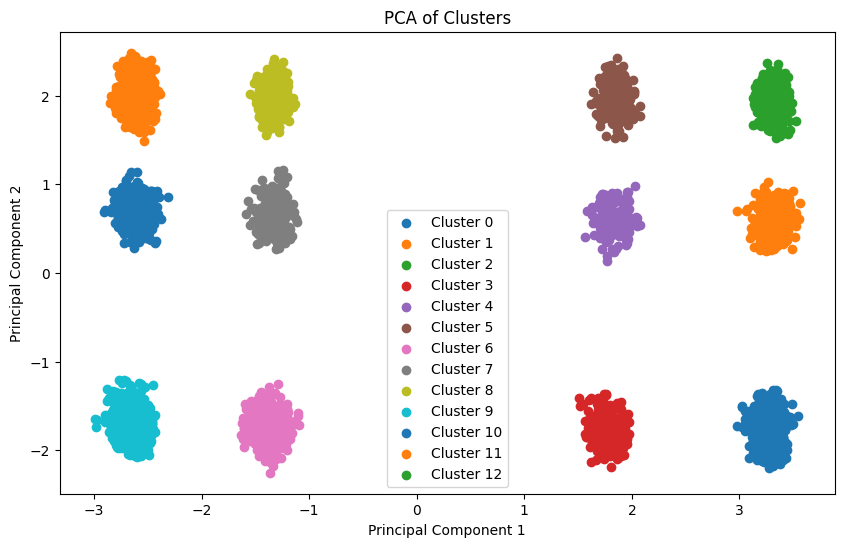

In [ ]:
#Calling the DBSCAN function
clustering_dbscan,runtime_dbscan,num_clusters_dbscan,name_dbscan=dbscan(X_r,find_best_DBSCAN_parameters)

In [ ]:
#Affinity Propagation
def afclustering(X_r, find_best_affinity_propagation_parameters):

    # Starting the timer
    start_time = time()

    # Finding the best affinity propagation parameters
    damping = find_best_affinity_propagation_parameters(X_r)

    # Instantiating and fitting the Affinity Propagation model
    af = AffinityPropagation(damping=damping).fit(X_r)

    # Ending the timer
    end_time = time()

    # Calculating the running time
    running_time = end_time - start_time

    # Getting the cluster labels
    cluster_labels = af.labels_
    print(f"Labels: {cluster_labels}")

    # Getting the number of clusters
    num_clusters = len(af.cluster_centers_indices_)

    # Predicting cluster labels
    predictions = af.predict(X_r)
    print(f"Predictions: {predictions}")

    # Calculating the counts of the clusters
    unique, counts = np.unique(predictions, return_counts=True)
    counts = counts.reshape(1,num_clusters)
    column_names = []
    for i in range(0, num_clusters):
      column_names.append(f"Cluster {i}")

    # Creating a dataframe
    countscldf = pd.DataFrame(counts, columns=column_names)
    print(countscldf)

    #Visulizing the PCA of Clusters
    plt.figure(figsize=(10, 6))
    for i in range(num_clusters):
        plt.scatter(X_r[predictions == i, 0], X_r[predictions == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Clusters')
    plt.legend()
    plt.show()

    return cluster_labels, running_time,num_clusters,"Affinity Propagation"

Best Silhouette Score: 0.8157306799235402
Best k: 0.7
Labels: [ 0  0  0 ...  9 11  9]
Predictions: [ 0  0  0 ...  9 11  9]
   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
0        457        262        334        209        274        141   

   Cluster 6  Cluster 7  Cluster 8  Cluster 9  Cluster 10  Cluster 11  
0        220        305        450        392         556         300  


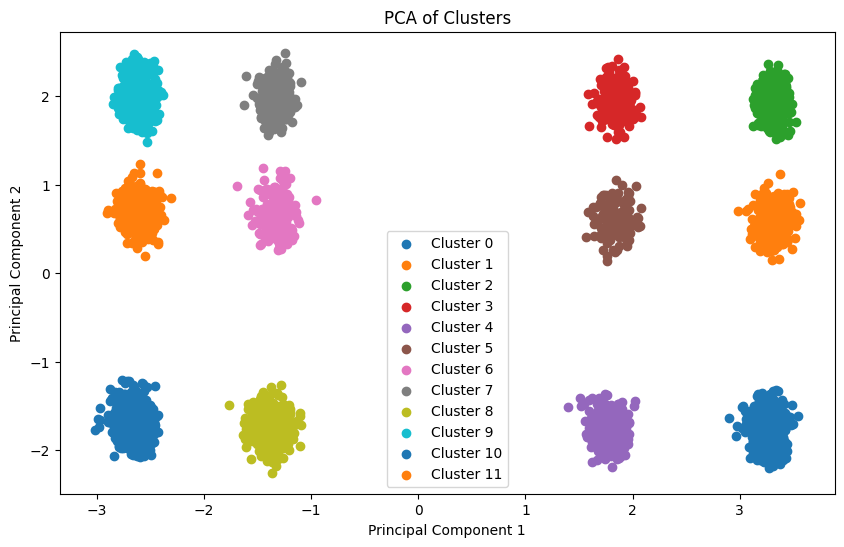

In [ ]:
# Ignoring ConvergenceWarning from Affinity Propagation
warnings.filterwarnings("ignore")

#Calling the Affinity Propagation function
clustering_af,runtime_af,num_clusters_af,name_affinity=afclustering(X_r,find_best_affinity_propagation_parameters)

In [ ]:
def kmeansclustring(X_r, find_best_kmeans_numberofclusters,n_init=10):
    # Starting the timer
    start_time = time()

    # Determining the optimal number of clusters
    n_clusters = find_best_kmeans_numberofclusters(X_r)

    # Instantiating and fitting the KMeans model
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_r)

    # Ending the timer
    end_time = time()

    # Calculating the running time
    running_time = end_time - start_time

    # Getting the cluster labels
    cluster_labels = kmeans.labels_
    print(f"Labels: {cluster_labels}")

    # Getting the number of clusters
    num_clusters = len(set(kmeans.labels_))

    # Predicting cluster labels
    predictions = kmeans.predict(X_r)
    print(f"Predictions: {predictions}")

   # Calculating the counts of the clusters
    unique, counts = np.unique(predictions, return_counts=True)
    counts = counts.reshape(1,num_clusters)
    column_names = []
    for i in range(0, num_clusters):
      column_names.append(f"Cluster {i}")

   # Creating a dataframe
    countscldf = pd.DataFrame(counts, columns=column_names)
    print(countscldf)

    #Visulizing the PCA of Clusters
    plt.figure(figsize=(10, 6))
    for i in range(num_clusters):
        plt.scatter(X_r[predictions == i, 0], X_r[predictions == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Clusters')
    plt.legend()
    plt.show()

    return cluster_labels, running_time,num_clusters,"Kmeans"

Best Silhouette Score: 0.8157306799235402
Best k: 12
Labels: [0 0 0 ... 1 6 1]
Predictions: [0 0 0 ... 1 6 1]
   Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
0        457        392        450        334        209        556   

   Cluster 6  Cluster 7  Cluster 8  Cluster 9  Cluster 10  Cluster 11  
0        300        262        305        274         220         141  


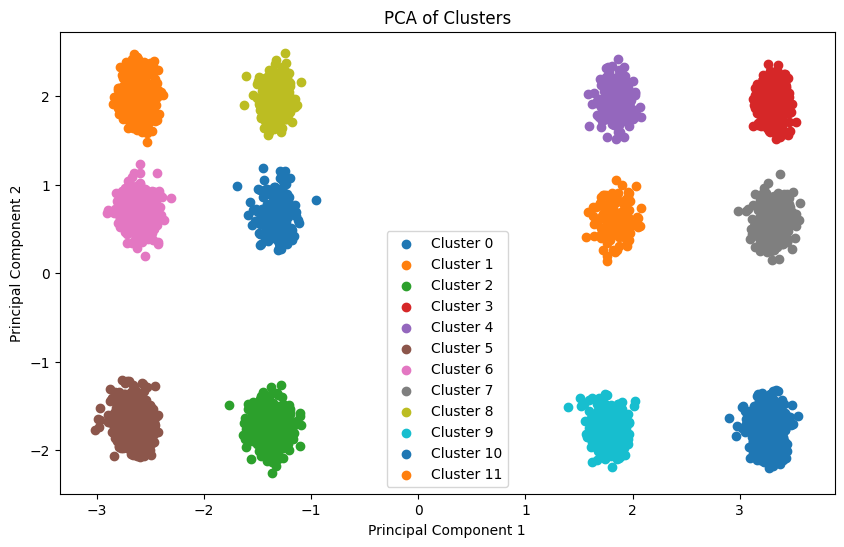

In [ ]:
#Calling Kmeans function
clustering_kmeans,runtime_kmeans,num_clusters_kmeans,name_kmeans=kmeansclustring(X_r,find_best_kmeans_numberofclusters,n_init=10)

In [ ]:
# Creating lists
clustring_methods=[clustering_af,clustering_kmeans,clustering_hr,clustering_dbscan]
runtimes=[runtime_af,runtime_kmeans,runtime_hr,runtime_dbscan]
names=[name_affinity,name_kmeans,name_hr,name_dbscan]
num_clusters=[num_clusters_af,num_clusters_kmeans,num_clusters_hr,num_clusters_dbscan]

In [ ]:
#Verification function
def verification(X_r, clustring_methods, runtimes, num_clusters, names):
    # Initializing variables
    max_average_score = -1
    max_average_runtime = -1
    method_label = None
    best_method_name = None
    best_num_clusters = None

    for method, runtime, num, name in zip(clustring_methods, runtimes, num_clusters, names):
        # Calculating scores
        silhouette_score_value = silhouette_score(X_r, method)
        davies_score = davies_bouldin_score(X_r, method)
        calinski_score = calinski_harabasz_score(X_r, method)

        # Calculating the average score using a weighted sum of the metrics
        average_score = (silhouette_score_value + calinski_score - davies_score) / 3
        average_score = round(average_score, 2)
        print(name + " : " + str(average_score))

        if average_score > max_average_score:
            max_average_score = average_score
            max_average_runtime = runtime
            method_label = method
            best_method_name = name
            best_num_clusters = num
        elif average_score == max_average_score:
            if runtime < max_average_runtime:
                max_average_runtime = runtime
                method_label = method
                best_method_name = name
                best_num_clusters = num

    # Printing the best method's performance metrics
    print("Max Average Score:", max_average_score)
    print("Max Average Runtime:", max_average_runtime)
    print("Method Label:", method_label)
    print("Best Method Name:", best_method_name)
    print("Number of Clusters:", best_num_clusters)

    return method_label, best_method_name, best_num_clusters

In [ ]:
# Creating dictionaries to store scores
silhouette_scores = {}
davies_scores = {}
calinski_scores={}
runtimes_dict={}

for method, runtime, num, name in zip(clustring_methods, runtimes, num_clusters, names):
    silhouette_scores[f"{name}_silhouette_score"] = silhouette_score(X_r, method)
    davies_scores[f"{name}_davies_score"] = davies_bouldin_score(X_r, method)
    calinski_scores[f"{name}_calinski_score"] = calinski_harabasz_score(X_r, method)
    runtimes_dict[name]=runtime

# Creating a dtaframe from the dictionaries
df = pd.DataFrame({
    'Method': names,
    'Silhouette Score': silhouette_scores.values(),
    'Davies-Bouldin Score': davies_scores.values(),
    'Calinski-Harabasz Score': calinski_scores.values(),
    'Runtime': runtimes_dict.values()
})

# Setting the method column as the index
df.set_index('Method', inplace=True)

df


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Runtime
Method,,,,
Affinity Propagation,0.815731,0.257121,82699.089449,234.745649
Kmeans,0.815731,0.257121,82699.089449,6.113219
Hierarchical,0.815731,0.257121,82699.089449,42.449858
DBSCAN,0.805844,1.164765,31255.864657,9.101040


In [ ]:
# Calling verification function and assigning values
label,name,num=verification(X_r,clustring_methods,runtimes,num_clusters,names)

Affinity Propagation : 27566.55
Kmeans : 27566.55
Hierarchical : 27566.55
DBSCAN : 10418.5
Max Average Score: 27566.55
Max Average Runtime: 6.113219499588013
Method Label: [0 0 0 ... 1 6 1]
Best Method Name: Kmeans
Number of Clusters: 12


In [ ]:
# Assigning the cluster labels to the 'Clusters' column in the initial dataset
raw_data['Clusters'] = label

# Initializing the 'Clusters Category' column with a default value
raw_data['Clusters Category'] = 'No Data'

# Generating cluster category names
cluster_categories = [f'Cluster {i}' for i in range(num)]

for i, category in enumerate(cluster_categories):
    # Assigning cluster category names based on cluster labels
    raw_data.loc[raw_data['Clusters'] == i, 'Clusters Category'] = category

In [ ]:
#Showing the raw_data
raw_data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Clusters,Clusters Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,Cluster 0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,Cluster 0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,Cluster 0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,7,Cluster 7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,5,Cluster 5
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,1,Cluster 1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,1,Cluster 1
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,6,Cluster 6


In [ ]:
#Saving raw_data file as csv for further analysis
#raw_data.to_csv('raw_data.csv',index=False)

In [ ]:
# Setting up the Dash web application
app = dash.Dash(__name__)

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1('Customer Type Analysis Dashboard'),

    # Dropdown for selecting column (used in both charts)
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[0],  # Setting default value
        multi=False,
        clearable=False
    ),

    # Graph component for displaying cluster distribution per selected column
    dcc.Graph(id='cluster-bar-chart'),

    # Dropdowns for selecting features for scatter plot
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[1],  # Setting default value
        clearable=False
    ),

    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in raw_data.columns],
        value=raw_data.columns[2],  # Setting default value
        clearable=False
    ),

    # Dropdown for selecting cluster
    dcc.Dropdown(
        id='cluster-dropdown',
        options=[{'label': f'Cluster {i}', 'value': i} for i in range(0, num)],
        value=0,  # Setting default value
        clearable=False
    ),

    # Graph component for displaying scatter plot
    dcc.Graph(id='cluster-scatter-plot'),

    # Graph component for displaying scatter plot
    dcc.Graph(id='cluster-bar-plot'),

    # Graph component for displaying scatter plot of all clusters together
    dcc.Graph(id='all-clusters-scatter-plot'),

    # Graph component for displaying bar chart of all clusters together
    dcc.Graph(id='all-clusters-bar-chart'),
])

# Callback function to update the bar chart based on dropdown selection
@app.callback(
    Output('cluster-bar-chart', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_cluster_bar_chart(selected_column):
    try:
        # Grouping data by selected column and clusters, and counting occurrences
        cluster_counts = raw_data.groupby([selected_column, 'Clusters']).size().reset_index(name='Count')
        # Sorting the DataFrame by count in descending order
        cluster_counts_sorted = cluster_counts.sort_values(by='Count', ascending=False)
        # Creating a grouped bar chart
        fig = px.bar(cluster_counts_sorted, x=selected_column, y='Count', color='Clusters', barmode='group',color_discrete_sequence=colors)
        fig.update_layout(title=f'{name} Cluster Distribution for {selected_column}')
        return fig
    except Exception as e:
        print(f"Error: {e}")
        return {}

# Callback function to update scatter plot based on selected features and cluster
@app.callback(
    Output('cluster-scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('cluster-dropdown', 'value')]
)
def update_cluster_scatter_plot(x_axis, y_axis, selected_cluster):
    # Filtering data for the selected cluster
    cluster_data = raw_data[raw_data['Clusters'] == selected_cluster]

    # Creating scatter plot
    fig = px.scatter(cluster_data, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - Cluster {selected_cluster}',color_discrete_sequence=colors)

    return fig

# Callback function to update bar plot based on selected features and cluster
@app.callback(
    Output('cluster-bar-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('cluster-dropdown', 'value')]
)
def update_cluster_bar_plot(x_axis, y_axis, selected_cluster):
    # Filtering data for the selected cluster
    cluster_data = raw_data[raw_data['Clusters'] == selected_cluster]

    # Determining which axis contains the numerical column
    numerical_axis = x_axis if x_axis in cluster_data.columns and cluster_data[x_axis].dtype in ['int64', 'float64'] else y_axis

    # Sorting the DataFrame based on the numerical column
    cluster_data_sorted = cluster_data.sort_values(by=numerical_axis)

    # Creating bar plot
    fig = px.bar(cluster_data_sorted, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - Cluster {selected_cluster}',color_discrete_sequence=colors)

    return fig

# Callback function to update scatter plot of all clusters together based on selected features
@app.callback(
    Output('all-clusters-scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_all_clusters_scatter_plot(x_axis, y_axis):
    # Creating scatter plot for all clusters
    fig = px.scatter(raw_data, x=x_axis, y=y_axis, color='Clusters',
                     title=f'{x_axis} vs {y_axis} - All Clusters',color_discrete_sequence=colors)

    return fig

# Callback function to update bar chart of all clusters together based on selected features
@app.callback(
    Output('all-clusters-bar-chart', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value')]
)
def update_all_clusters_bar_chart(x_axis, y_axis):

    # Determining which axis contains the numerical column
    numerical_axis = x_axis if x_axis in raw_data.columns and raw_data[x_axis].dtype in ['int64', 'float64'] else y_axis

    # Sorting the DataFrame based on the numerical column
    raw_data_sorted = raw_data.sort_values(by=numerical_axis)

    # Creating bar chart for all clusters using 'Clusters Category'
    fig = px.bar(raw_data_sorted, x=x_axis, y=y_axis, color='Clusters Category',
                 title=f'{x_axis} vs {y_axis} - All Clusters',color_discrete_sequence=colors)

    return fig

# Running the web application
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
#References
#https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
#https://github.com/Pitsillides91/Python-Tutorials/tree/master/Unsupervised%20Learning
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html
#https://www.geeksforgeeks.org/affinity-propagation/
#https://scikit-learn.org/stable/modules/model_evaluation.html